In [563]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [564]:
# cars=pd.read_csv("/content/car_prices.csv")
cars=pd.read_csv("/Users/vivekrajashekaran/Downloads/car_prices.csv")

cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Understanding the data

In [565]:
cars.shape

(558837, 16)

In [566]:
cars.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [567]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [568]:
cars.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [569]:
cars.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [570]:
cars.select_dtypes(include=np.number).columns

Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')

In [571]:
num_cols=['odometer', 'mmr','sellingprice'] # numerical columns

In [572]:
cars["saledate"].dtypes

dtype('O')

In [573]:
cars.select_dtypes(include='object').columns

Index(['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller', 'saledate'],
      dtype='object')

In [574]:
cat_cols=['year','condition','make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller', 'saledate']  # categorical columns

# UNIVARIATE ANALYSIS
-For numerical and categorical



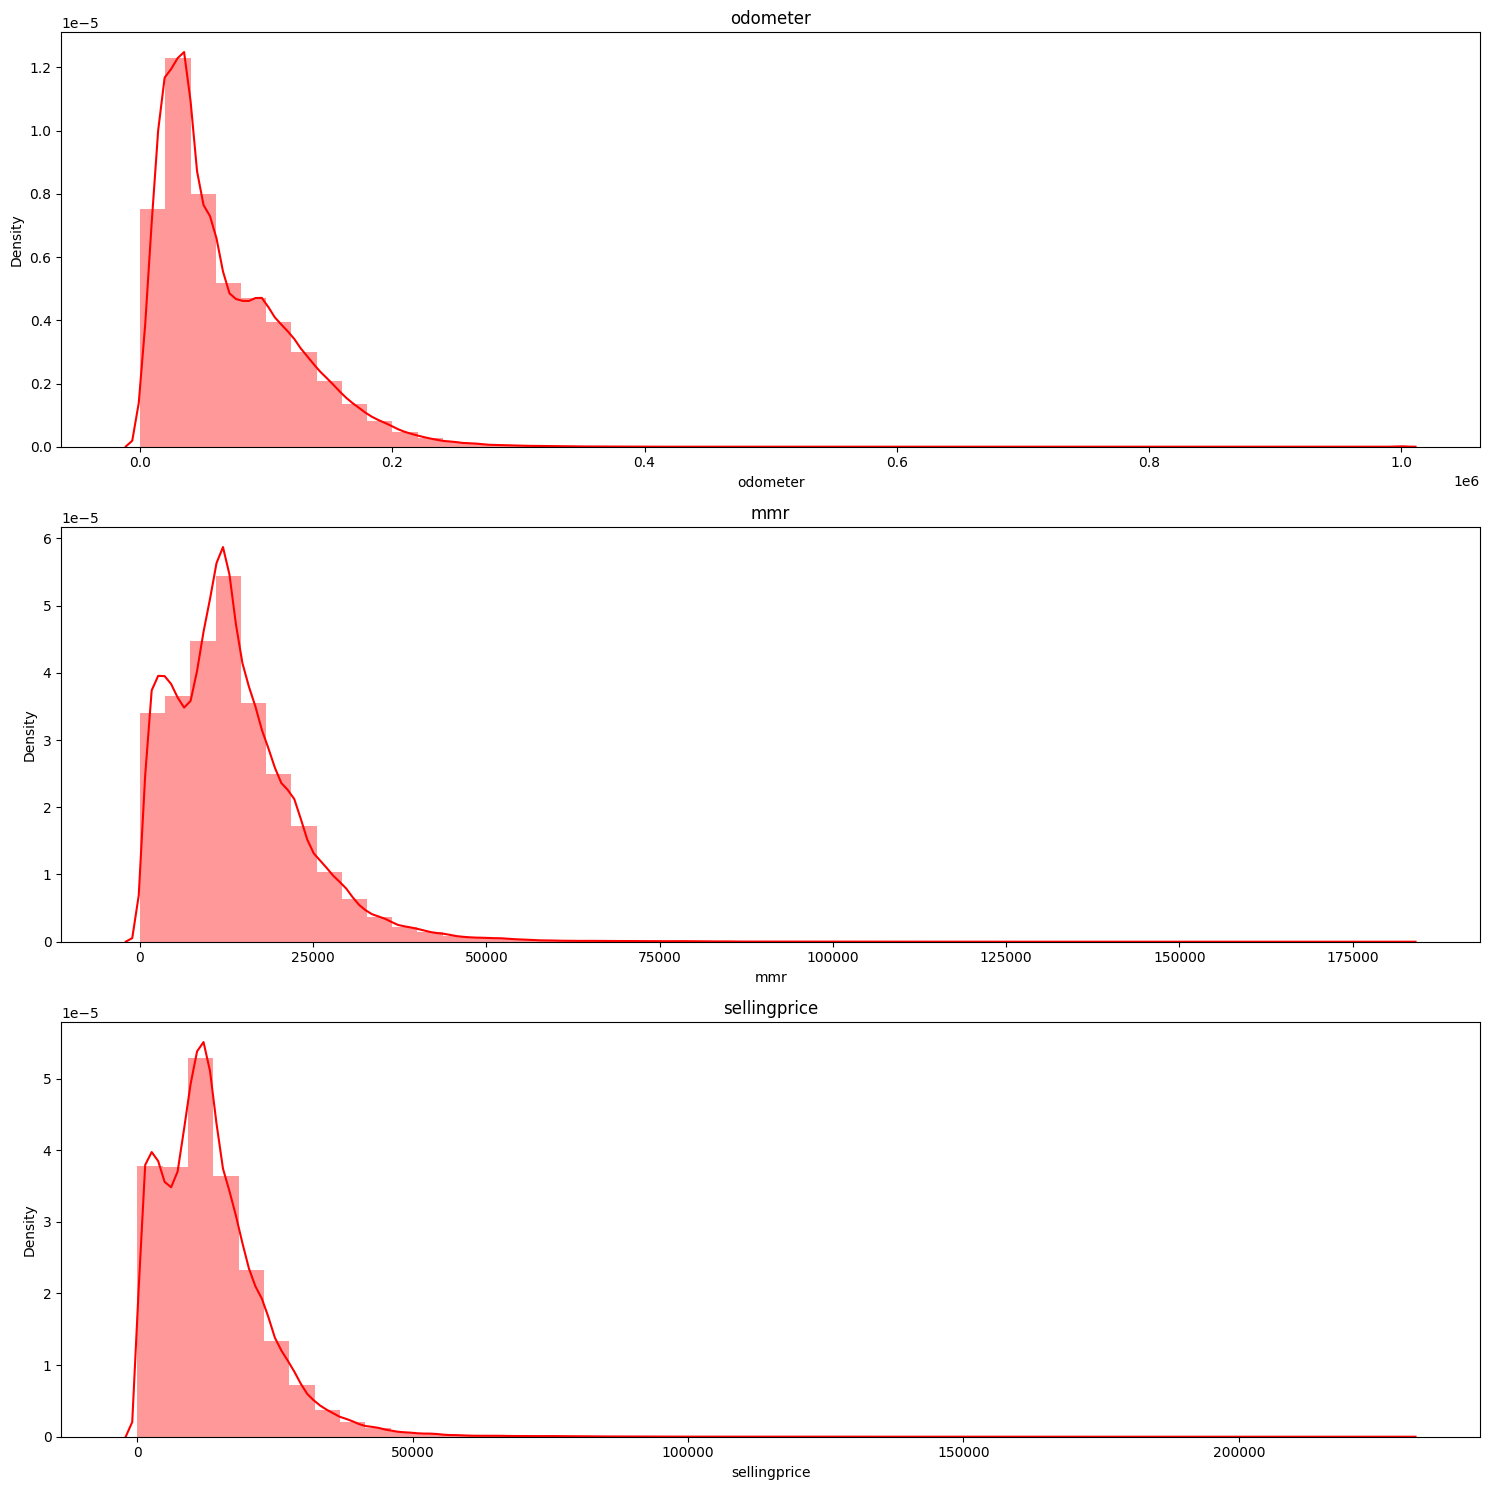

In [575]:
# NUMERICAL
nrows=3
ncols=1
iterator=1
plt.figure(figsize=(15,15))
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(cars.loc[:,i],color="red")
    plt.title(i)
    iterator=iterator+1 # it helps us in printing the plot
plt.tight_layout() # takecare of presentation of multiple plots

In [576]:
cars.select_dtypes(exclude=np.number).columns.to_list()
## cant visualise seller,salesdate,vin,trim,model  

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

# INFERENCES

ODOMETER AND MMR AND Sellingprice ARE POSITIVELY(RIGHT) SKEWED.
* Most cars have low normalized odomoter readings indicates less usage
  
* Most cars have MMR Values within range(below 50000)

In [577]:
cat_cols

['year',
 'condition',
 'make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

In [578]:
cat=['transmission','interior']

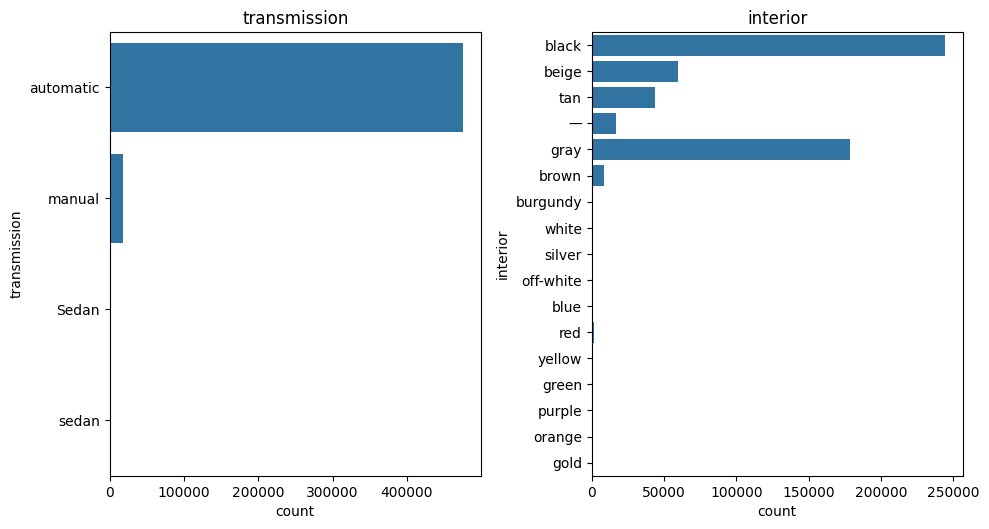

In [579]:
nrows=3
ncols=2
iterator=1
plt.figure(figsize=(10,15))
for i in cat:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(y=cars[i])
    plt.title(i)
    iterator=iterator+1 # it helps us in printing the plot
plt.tight_layout()
plt.show()
# INFERENCES :the automatic is having max valuecounts and sedan is not transmission we need to drop
#interior :black is having max

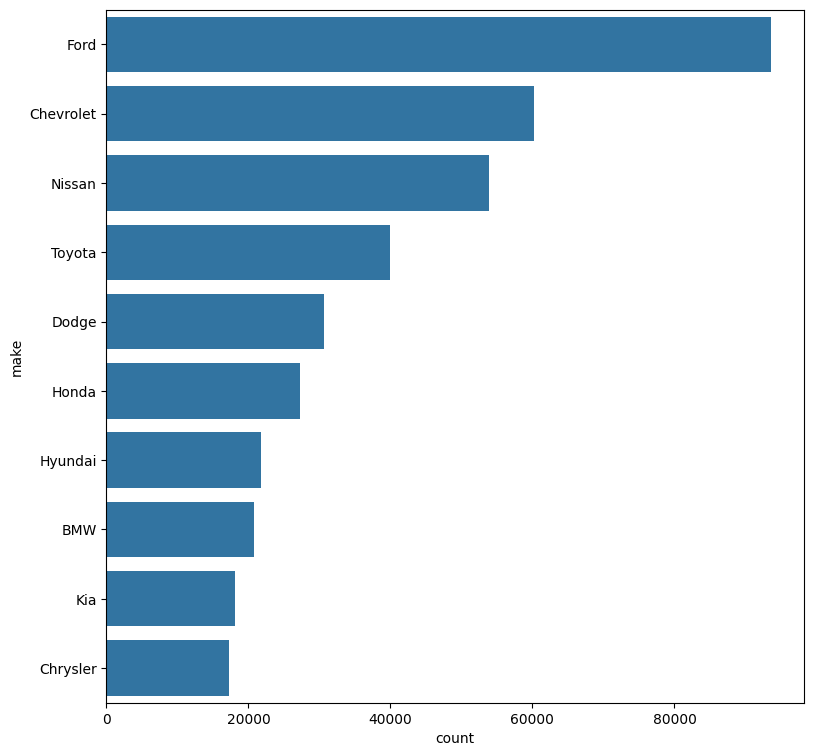

In [580]:
## MAKE INFERENCES
plt.figure(figsize=(9,9))
top_10_Car_Make = cars["make"].value_counts().head(10).index
sns.countplot(y=cars[cars["make"].isin(top_10_Car_Make)]["make"], order=top_10_Car_Make)
plt.show()

In [581]:
# Car_Body

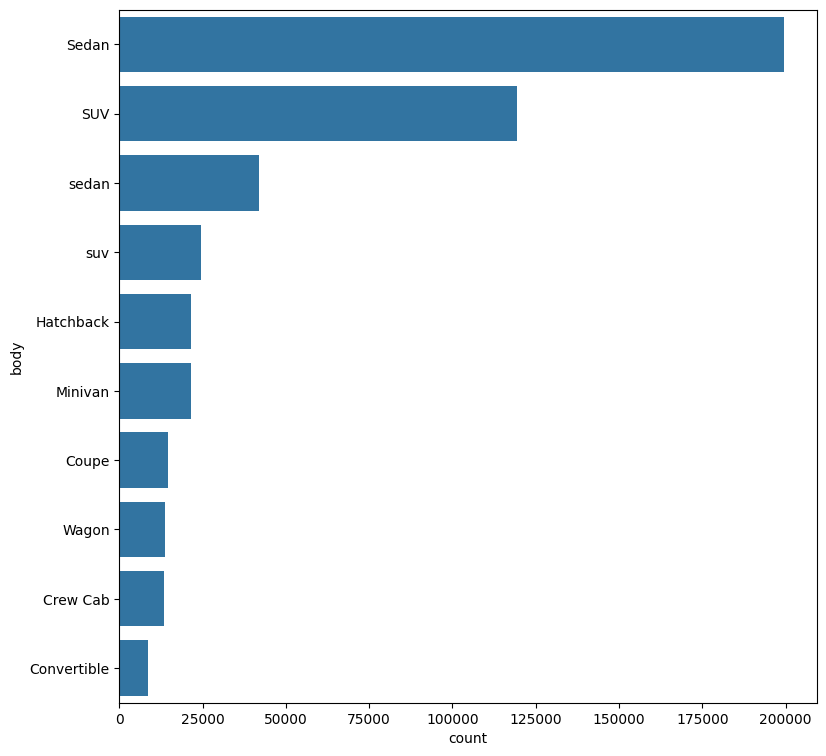

In [582]:
plt.figure(figsize=(9,9))
top_10_Car_Bodies = cars["body"].value_counts().head(10).index
sns.countplot(y=cars[cars["body"].isin(top_10_Car_Bodies)]["body"], order=top_10_Car_Bodies)
plt.show()

In [583]:
# States 

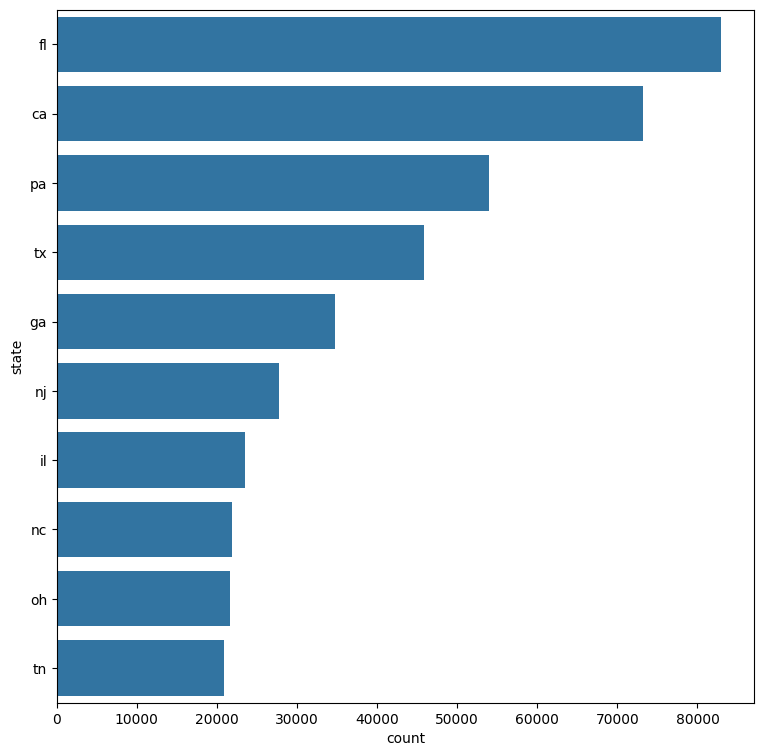

In [584]:
plt.figure(figsize=(9,9))
top_10_states = cars["state"].value_counts().head(10).index
sns.countplot(y=cars[cars["state"].isin(top_10_states)]["state"], order=top_10_states)
plt.show()

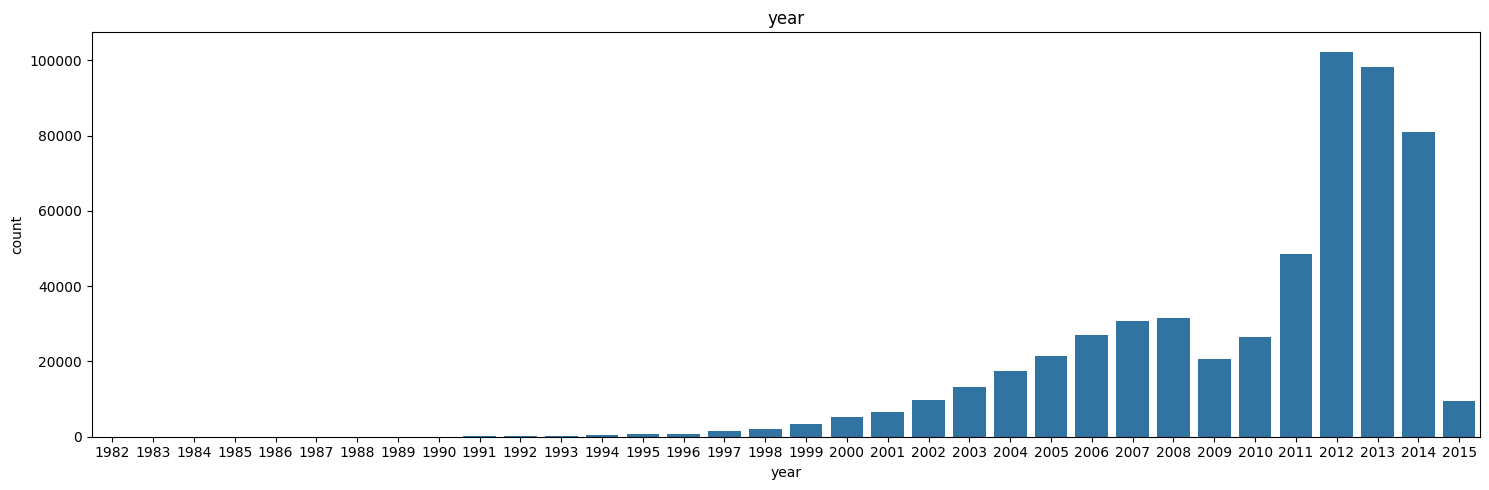

In [585]:
#Year
plt.figure(figsize=(15,5))
sns.countplot(x=cars["year"])
plt.title("year")
plt.tight_layout()
plt.show()
## inference
#sharp increse in sales after the decade of 1990 dipped in 2009 and 2010 and 2015

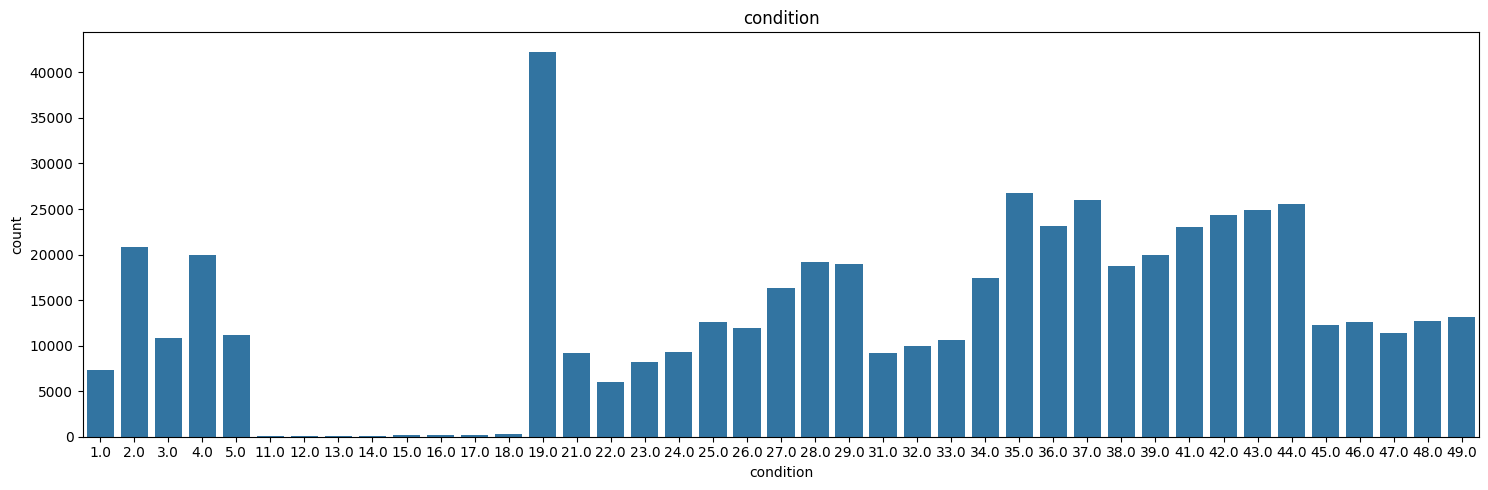

In [586]:
#condition
plt.figure(figsize=(15,5))
sns.countplot(x=cars["condition"])
plt.title("condition")
plt.tight_layout()
plt.show()
#condition number with 19 having the maximum value counts,therefore maximum vehicles are of average condition(not too old or new)

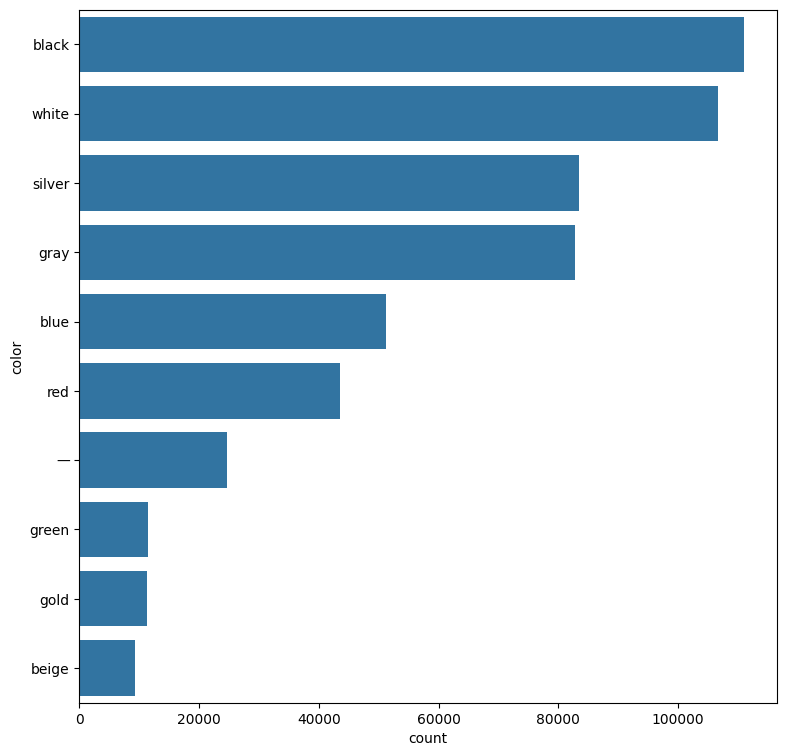

In [587]:
#color
plt.figure(figsize=(9,9))
top_10_Car_Colour = cars["color"].value_counts().head(10).index
sns.countplot(y=cars[cars["color"].isin(top_10_Car_Colour)]["color"], order=top_10_Car_Colour)
plt.show()

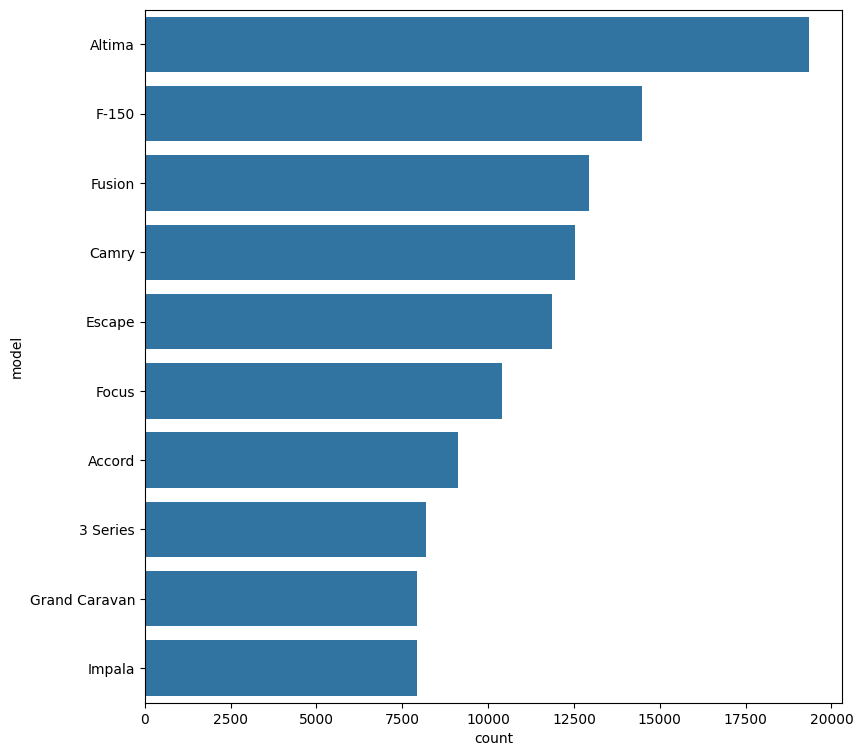

In [588]:
#model
plt.figure(figsize=(9,9))
top_10_Car_Models = cars["model"].value_counts().head(10).index
sns.countplot(y=cars[cars["model"].isin(top_10_Car_Models)]["model"], order=top_10_Car_Models)
plt.show()

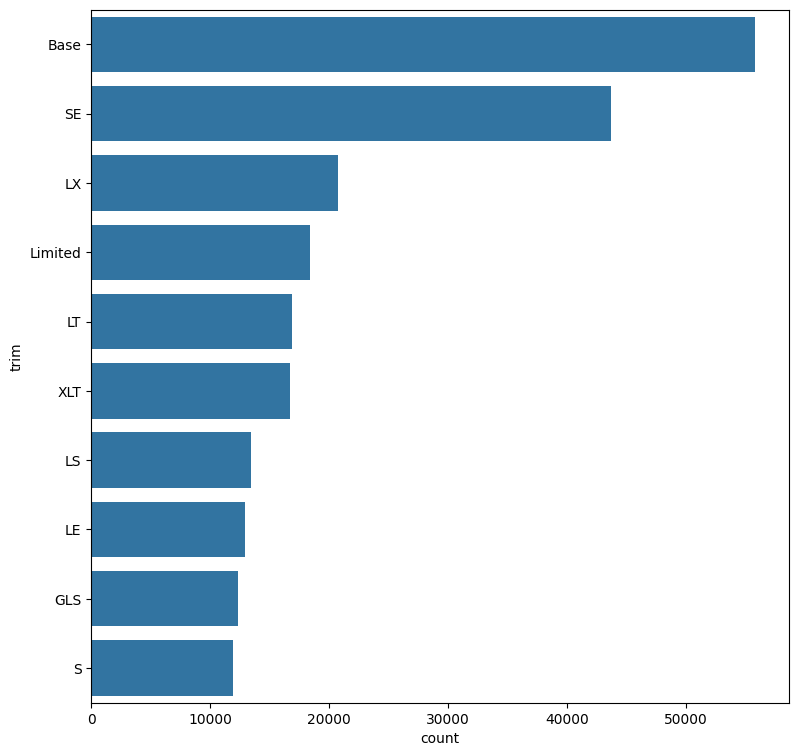

In [589]:
#Trim
plt.figure(figsize=(9,9))
top_10_Car_Trim = cars["trim"].value_counts().head(10).index
sns.countplot(y=cars[cars["trim"].isin(top_10_Car_Trim)]["trim"], order=top_10_Car_Trim)
plt.show()

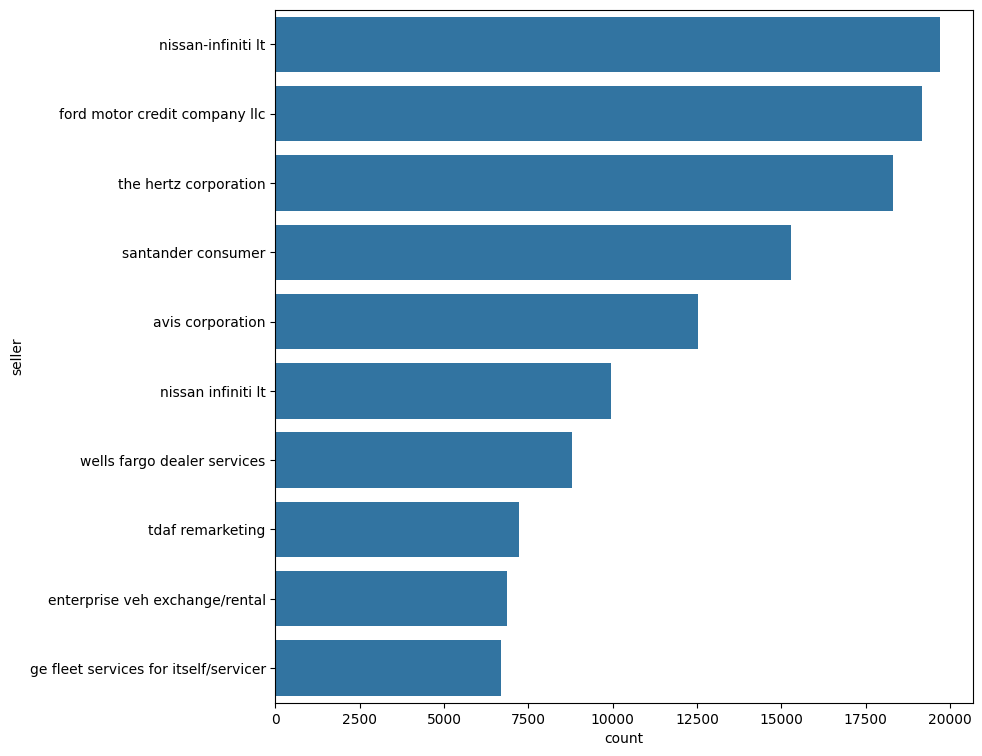

In [590]:
#seller
plt.figure(figsize=(9,9))
top_10_Car_Seller = cars["seller"].value_counts().head(10).index
sns.countplot(y=cars[cars["seller"].isin(top_10_Car_Seller)]["seller"], order=top_10_Car_Seller)
plt.show()

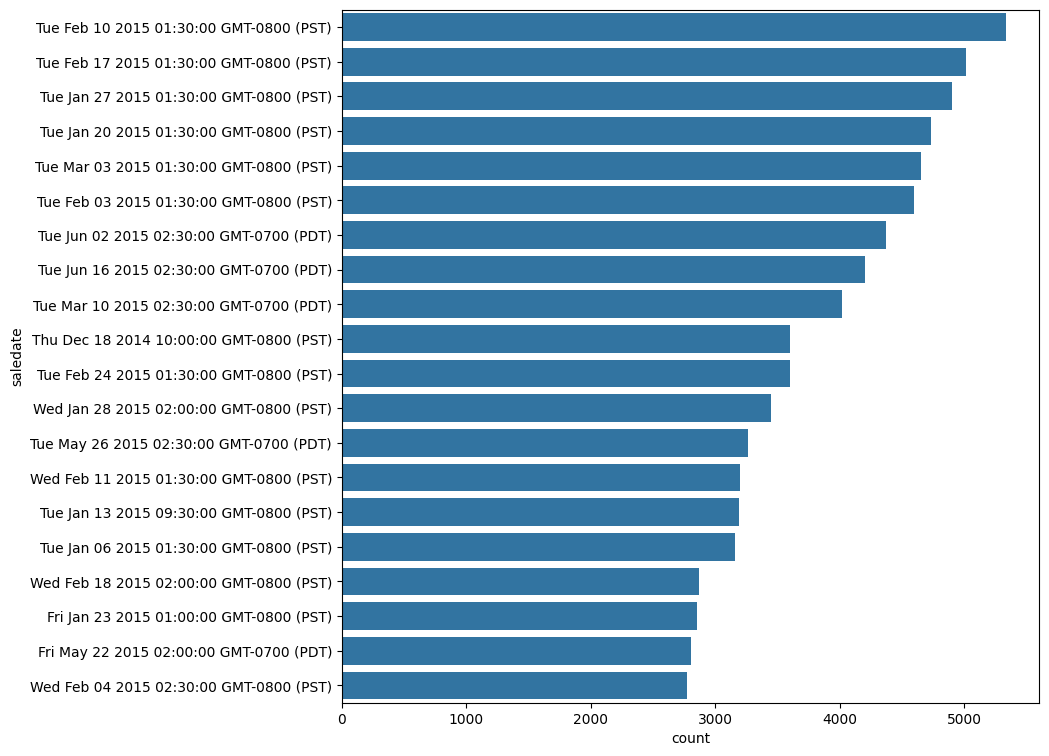

In [591]:
#saledate
plt.figure(figsize=(9,9))
top_10_Car_Saledate = cars["saledate"].value_counts().head(20).index
sns.countplot(y=cars[cars["saledate"].isin(top_10_Car_Saledate)]["saledate"], order=top_10_Car_Saledate)
plt.show()

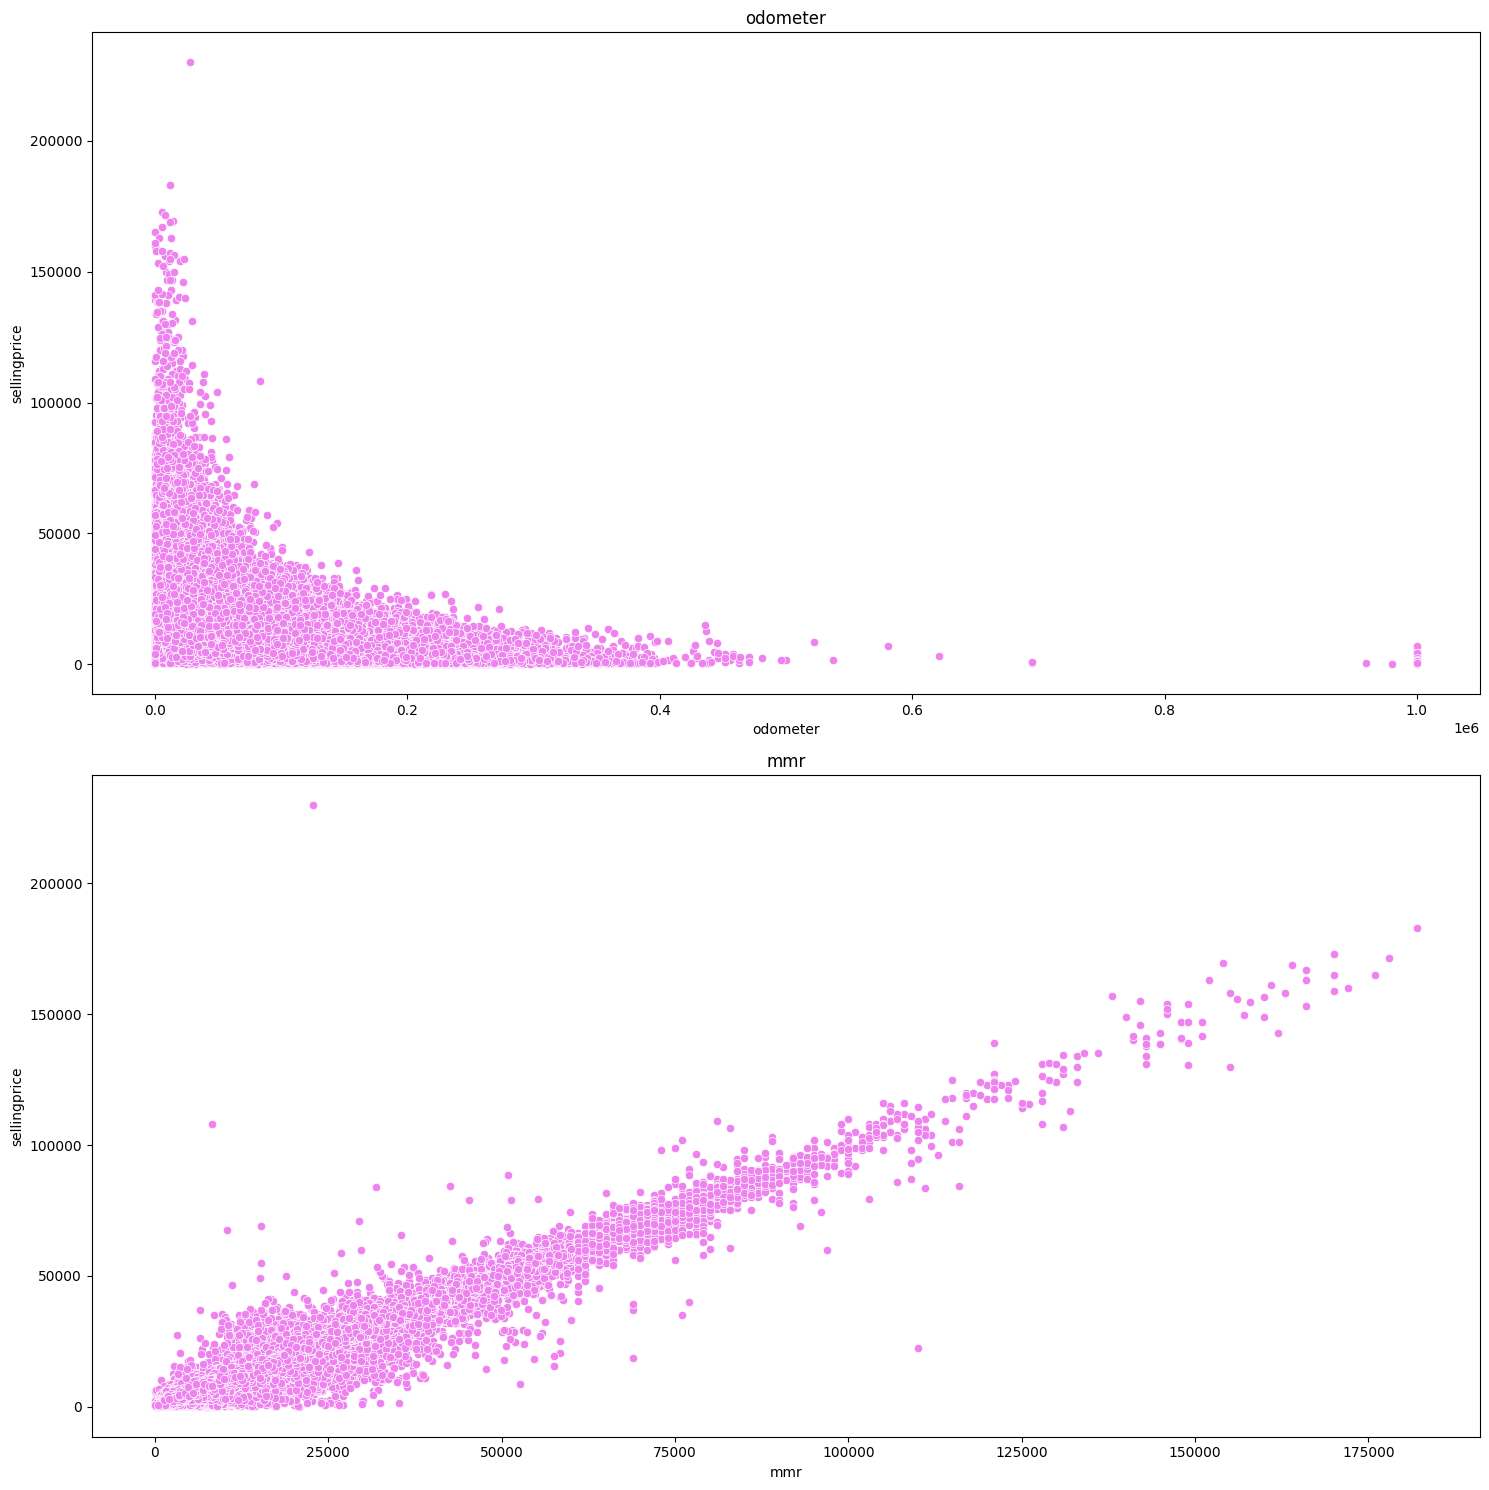

In [592]:
# BIVARIATE ANALYSIS
num_cols=['odometer', 'mmr'] # numerical columns
nrows=2
ncols=1
iterator=1
plt.figure(figsize=(15,15))
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(x=cars[i],y="sellingprice",data=cars,color="violet")
    plt.title(i)
    iterator=iterator+1 # it helps us in printing the plot
plt.tight_layout()


INFERENCES OF NUMERIC VS NUMERIC
##*Inference**

when the odometer reading increases the selling price decreses

when the mmr value increses the selling price also increases

CAT vs NUM

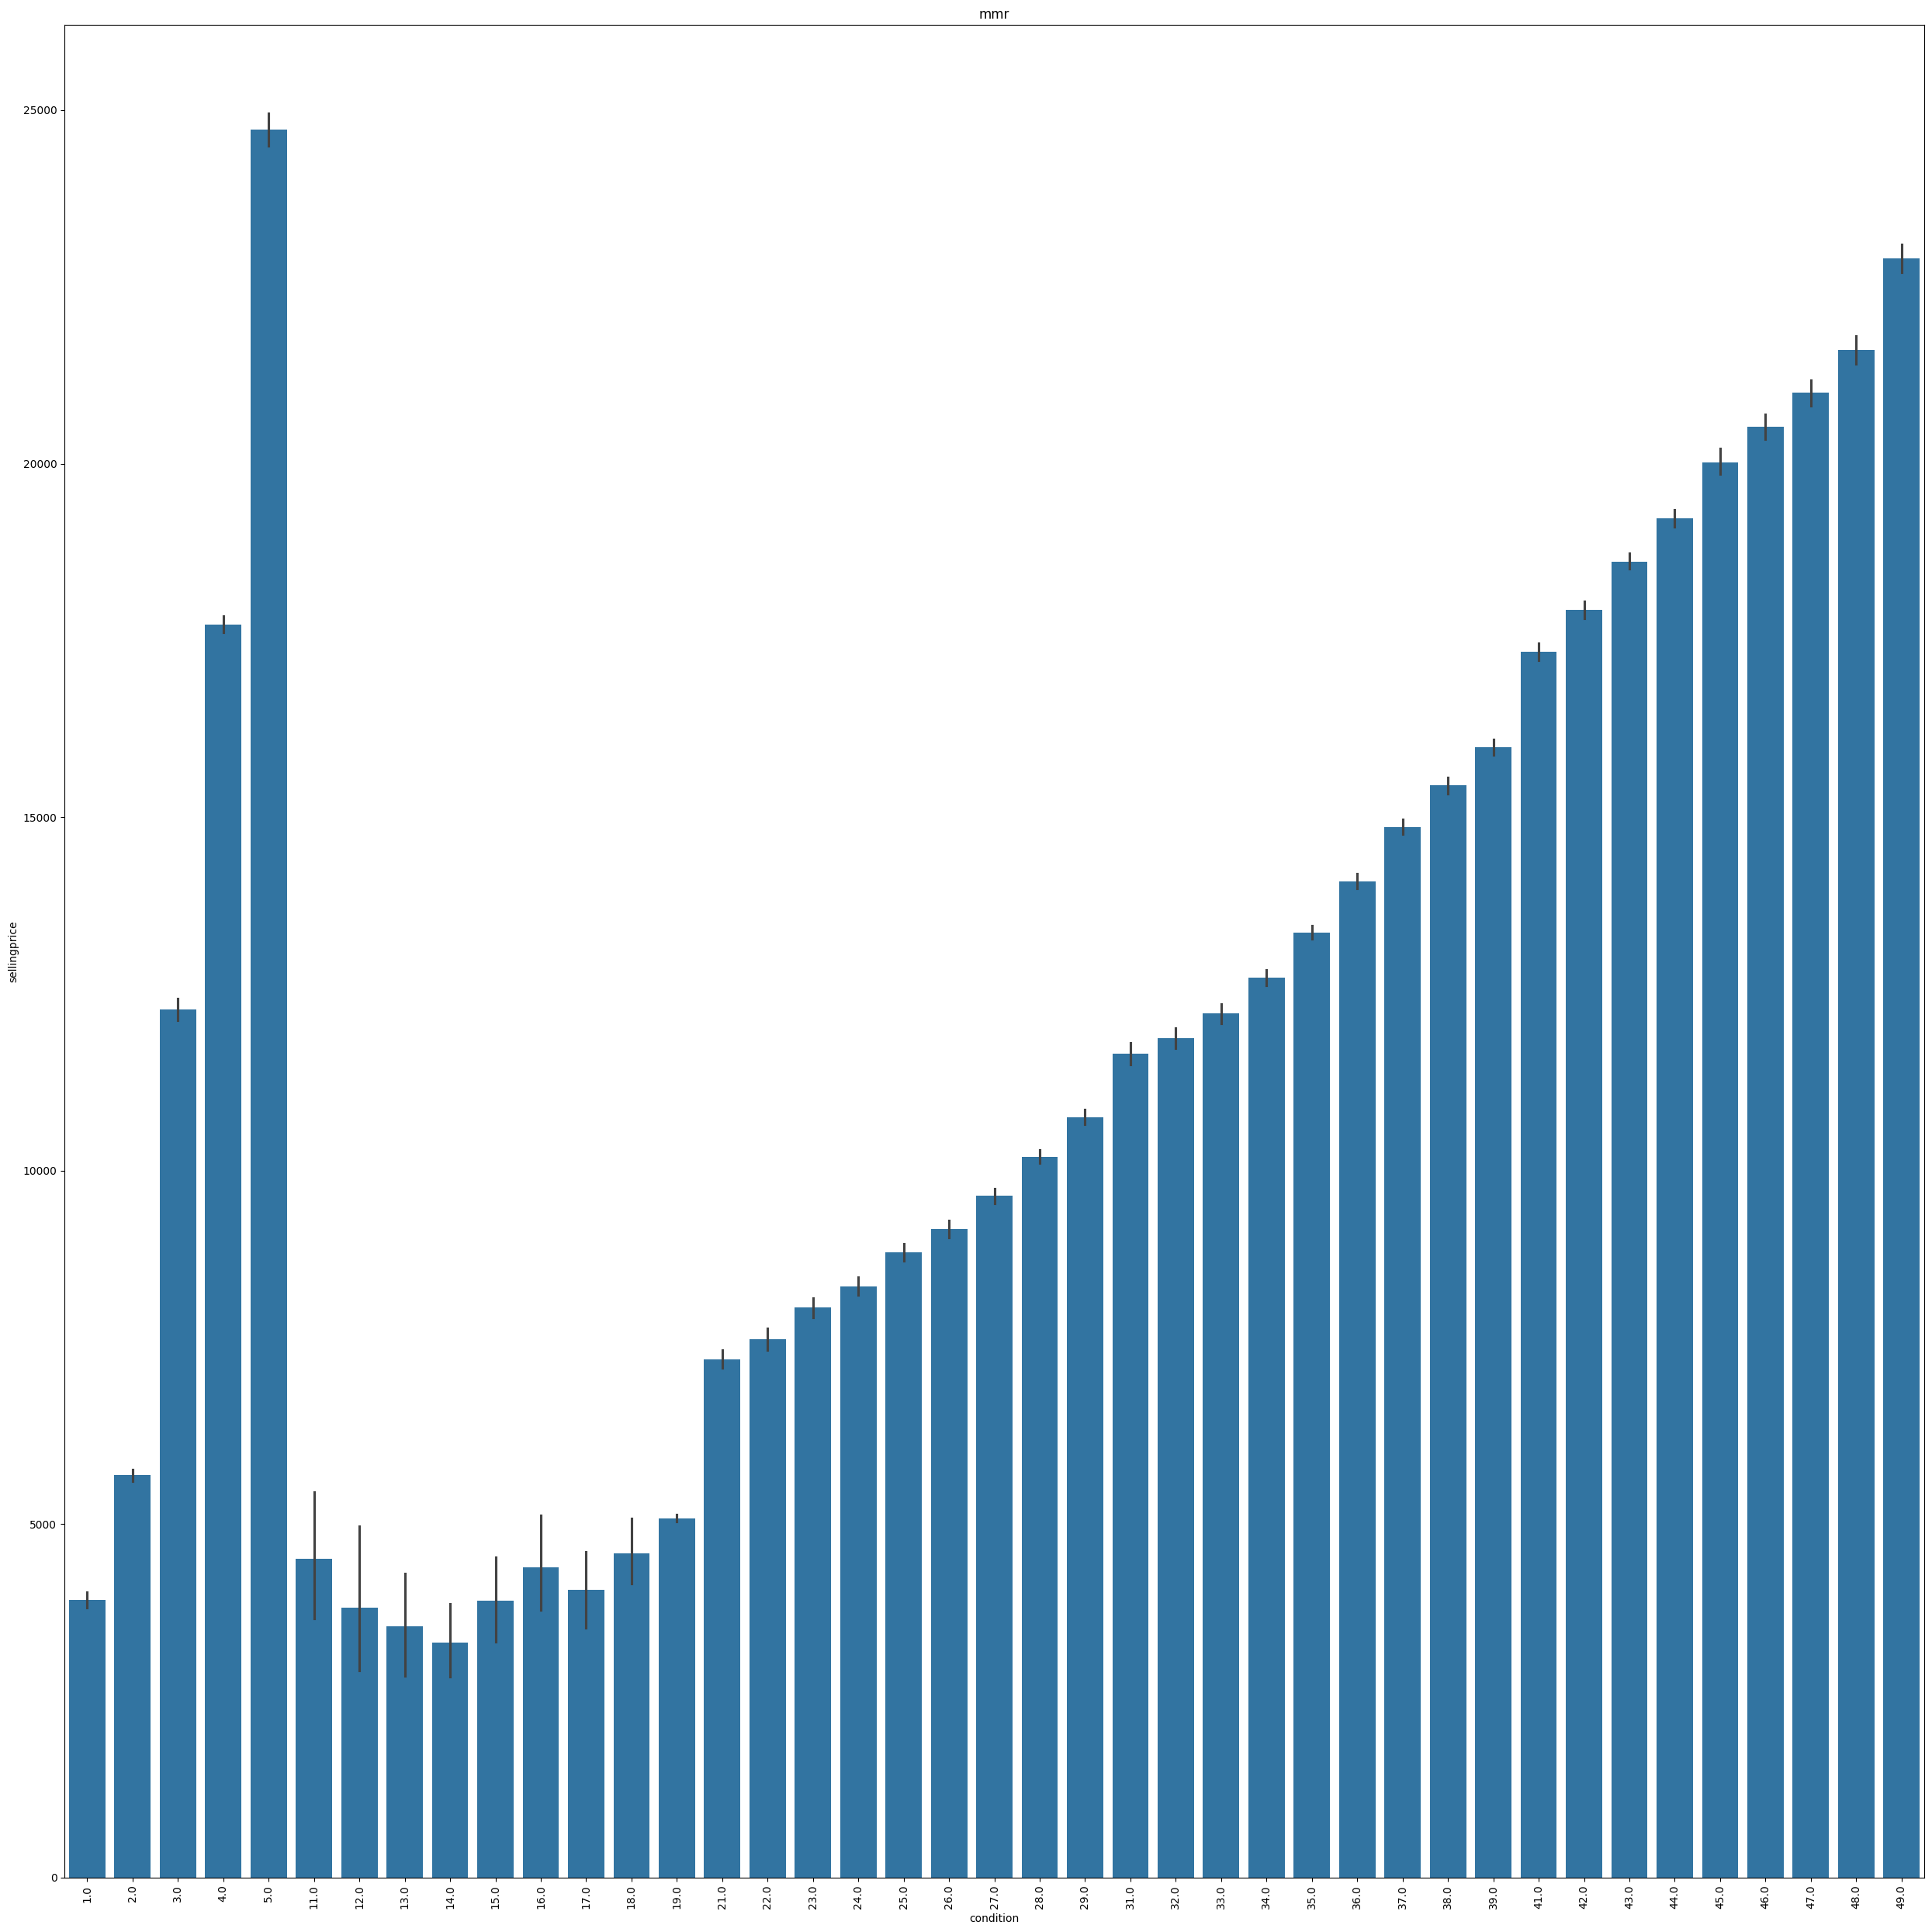

In [593]:
#1.condition vs selling price
plt.figure(figsize=(25,25))
sns.barplot(x=cars["condition"],y="sellingprice",data=cars)
plt.title(i)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

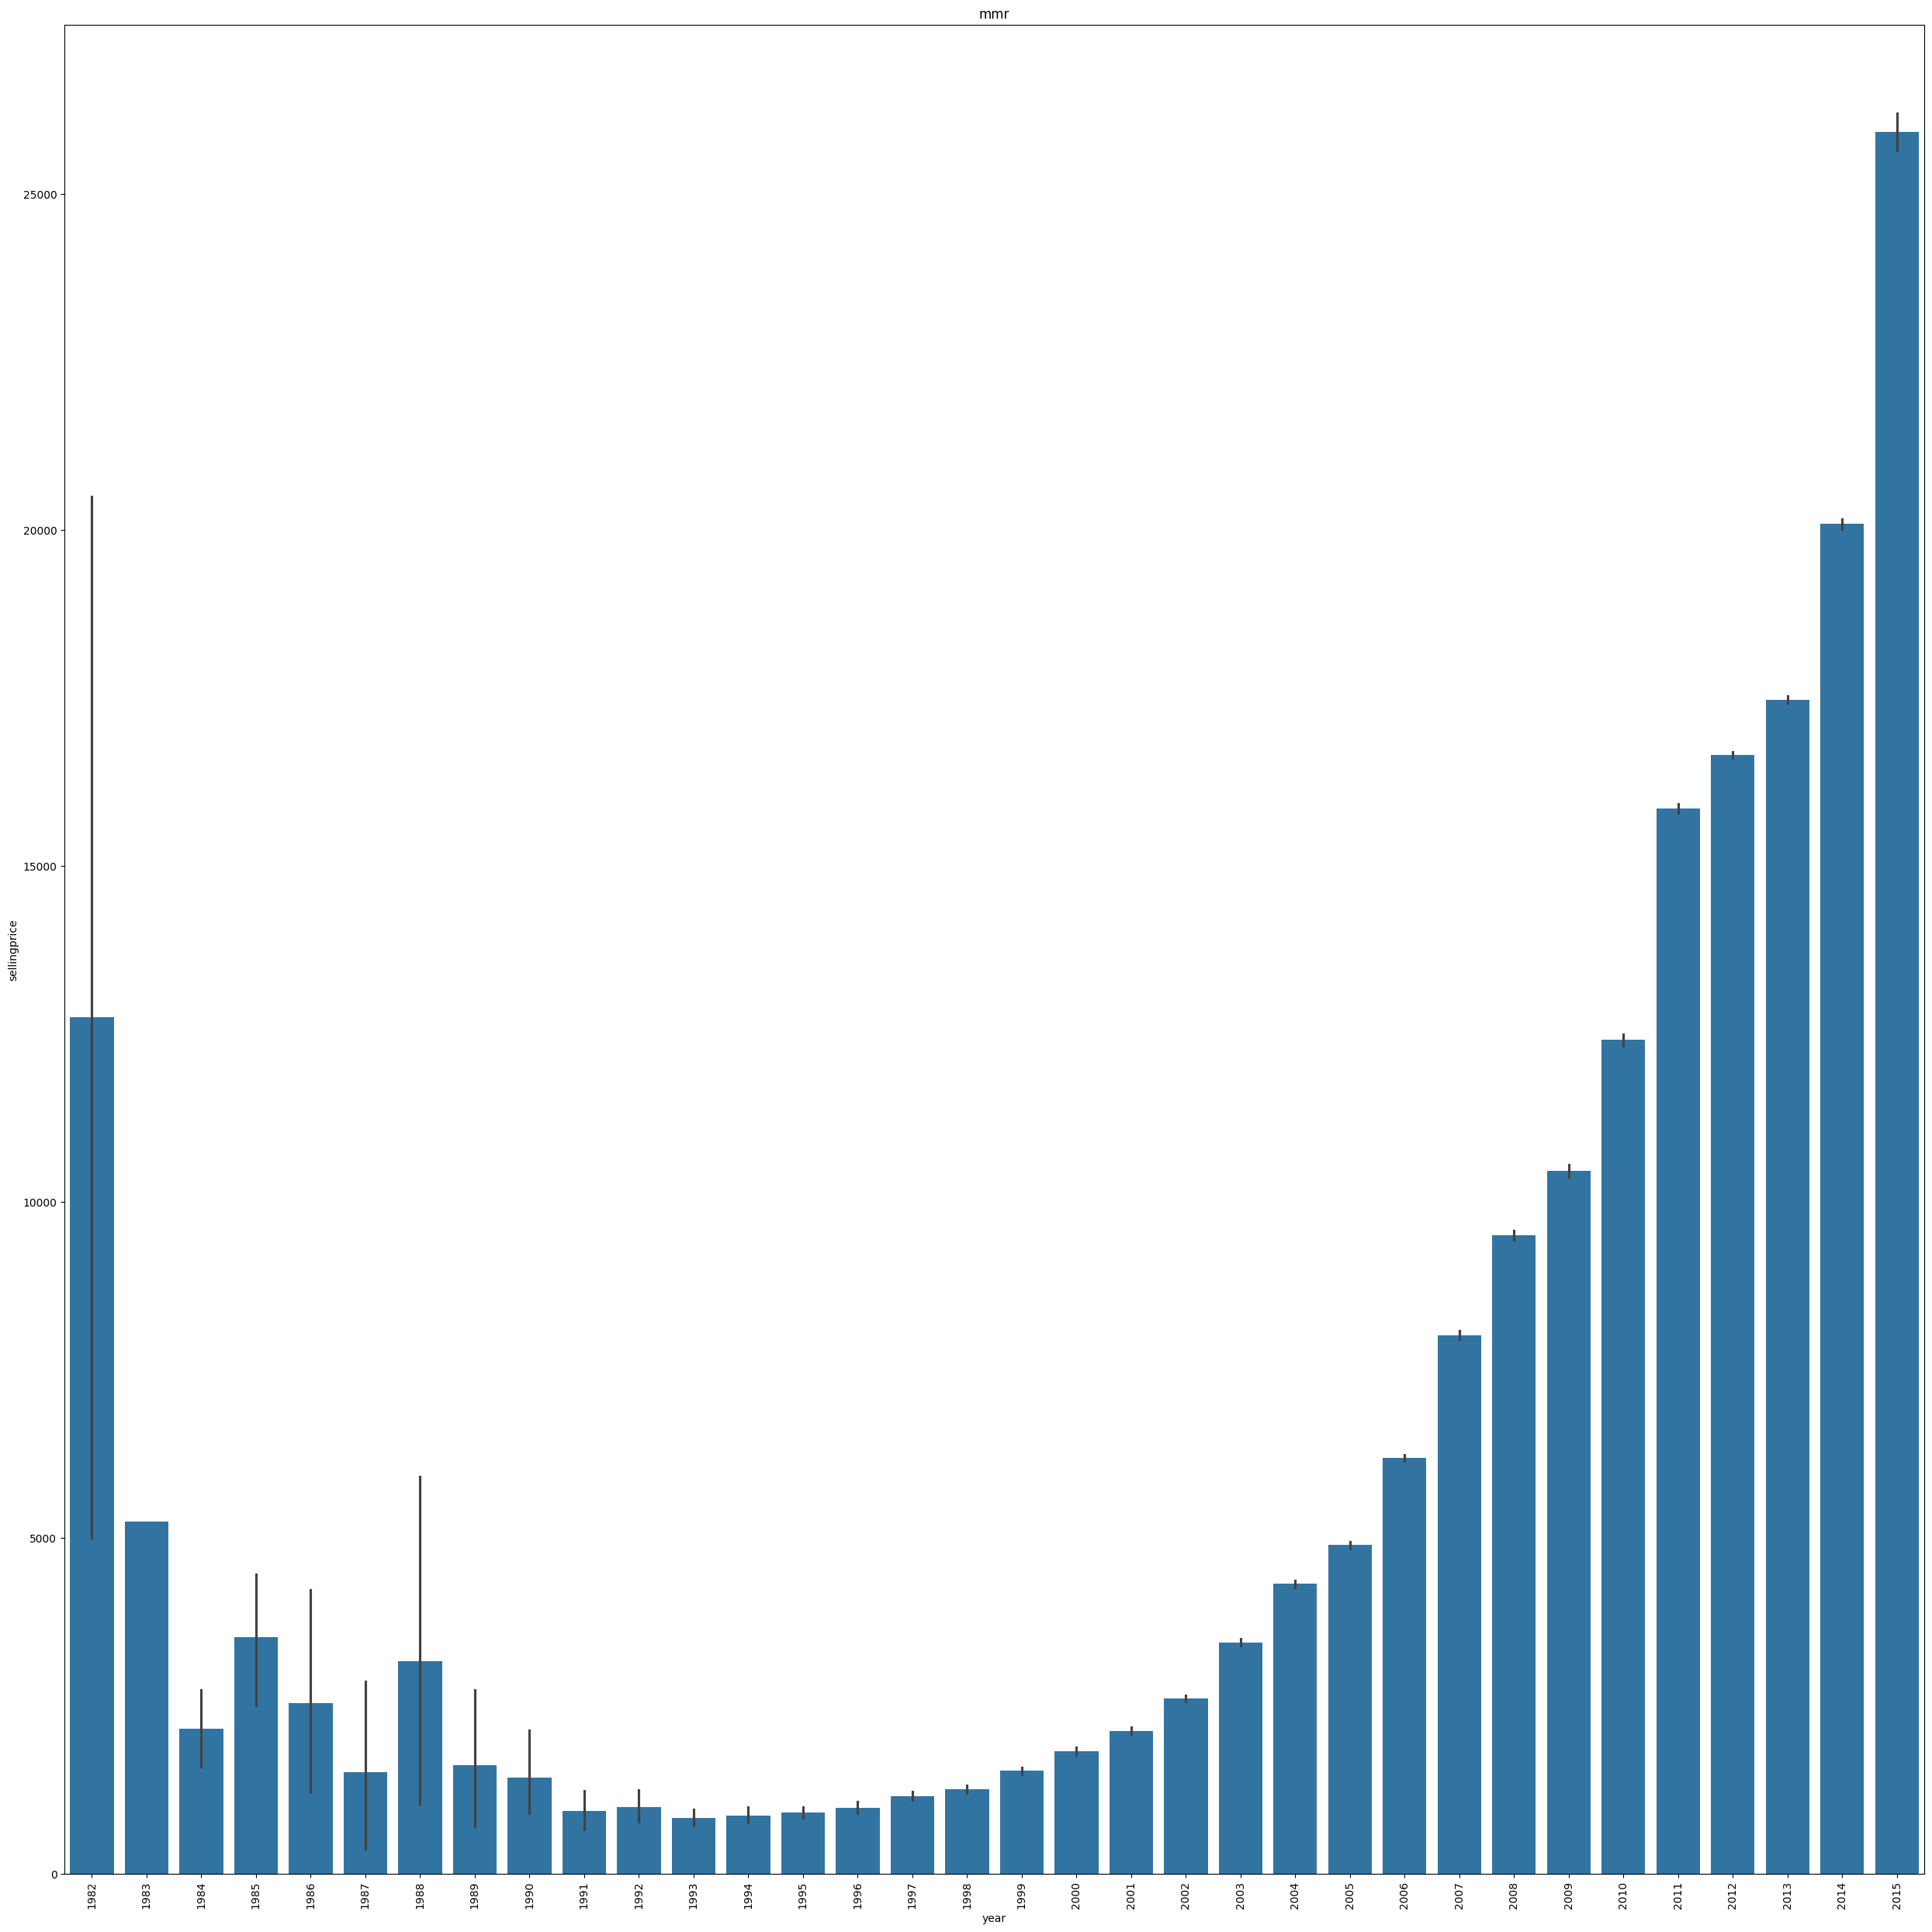

In [594]:
#2.year vs selling price
plt.figure(figsize=(25,25))
sns.barplot(x=cars["year"],y="sellingprice",data=cars)
plt.title(i)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

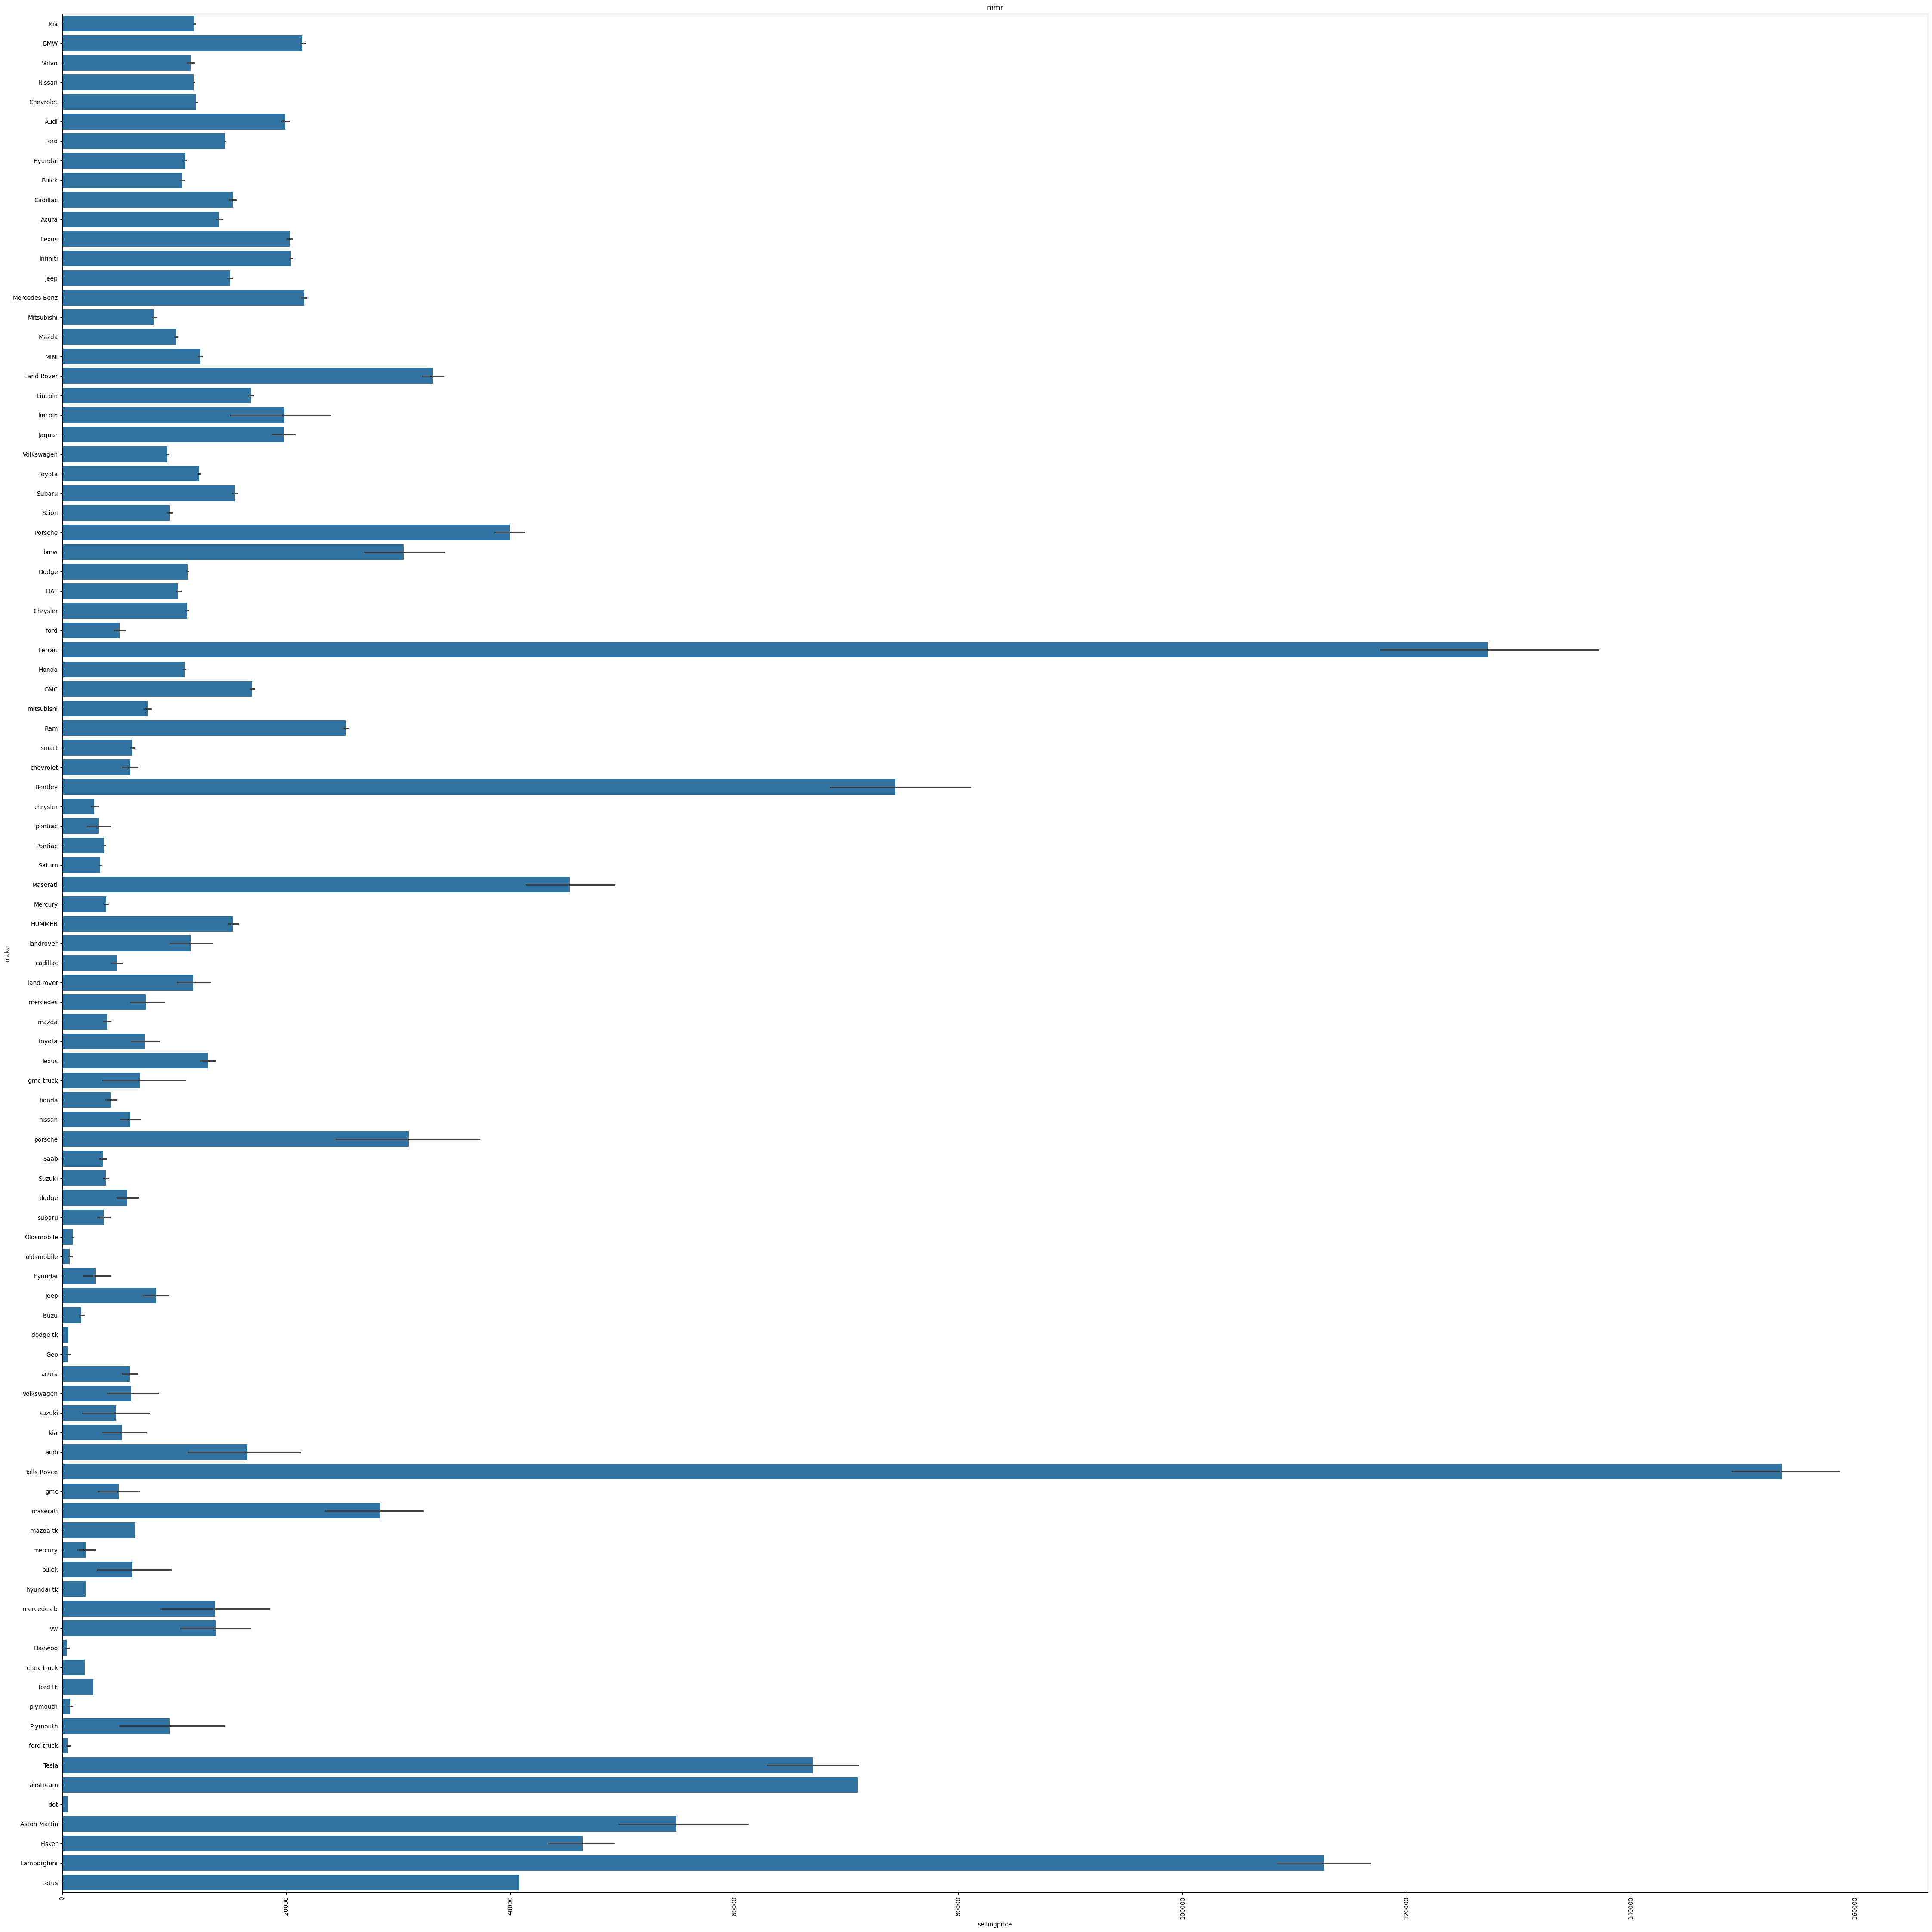

In [595]:
#3.make vs sellling price
plt.figure(figsize=(45,45))
sns.barplot(y=cars["make"],x="sellingprice",data=cars)
plt.title(i)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


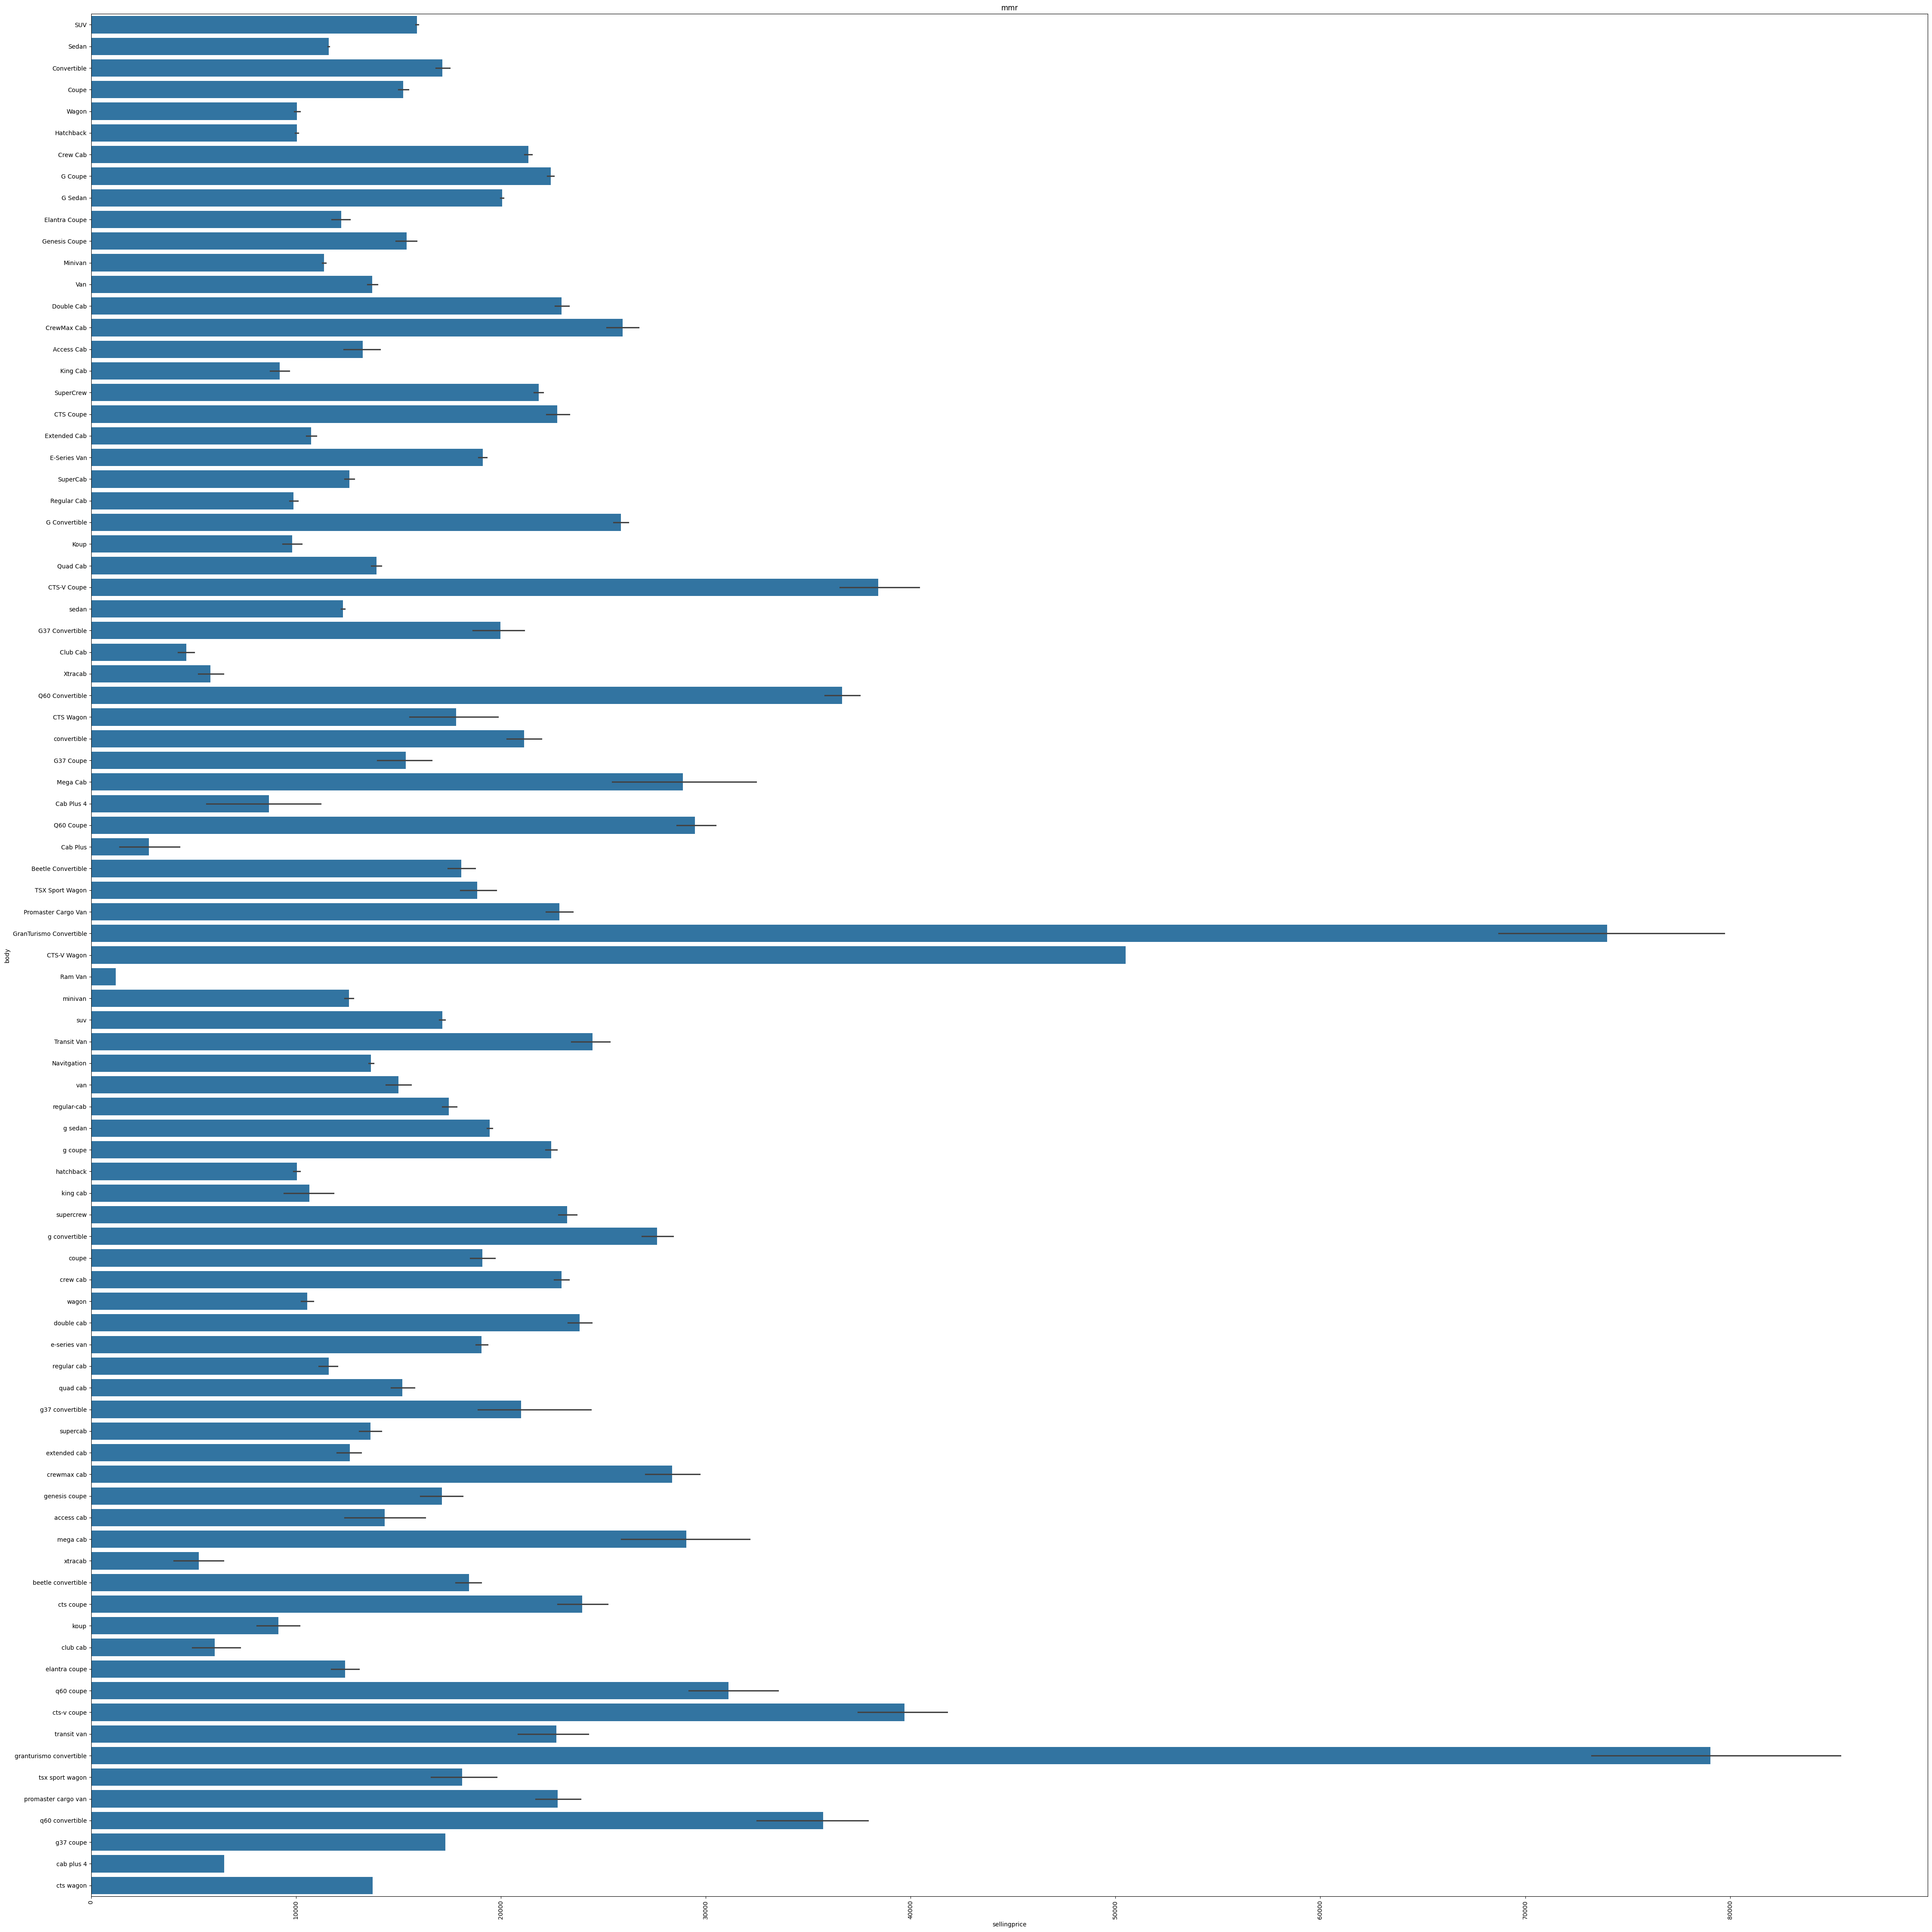

In [596]:
#4.Body vs selling price
plt.figure(figsize=(45,45))
sns.barplot(y=cars["body"],x="sellingprice",data=cars)
plt.title(i)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

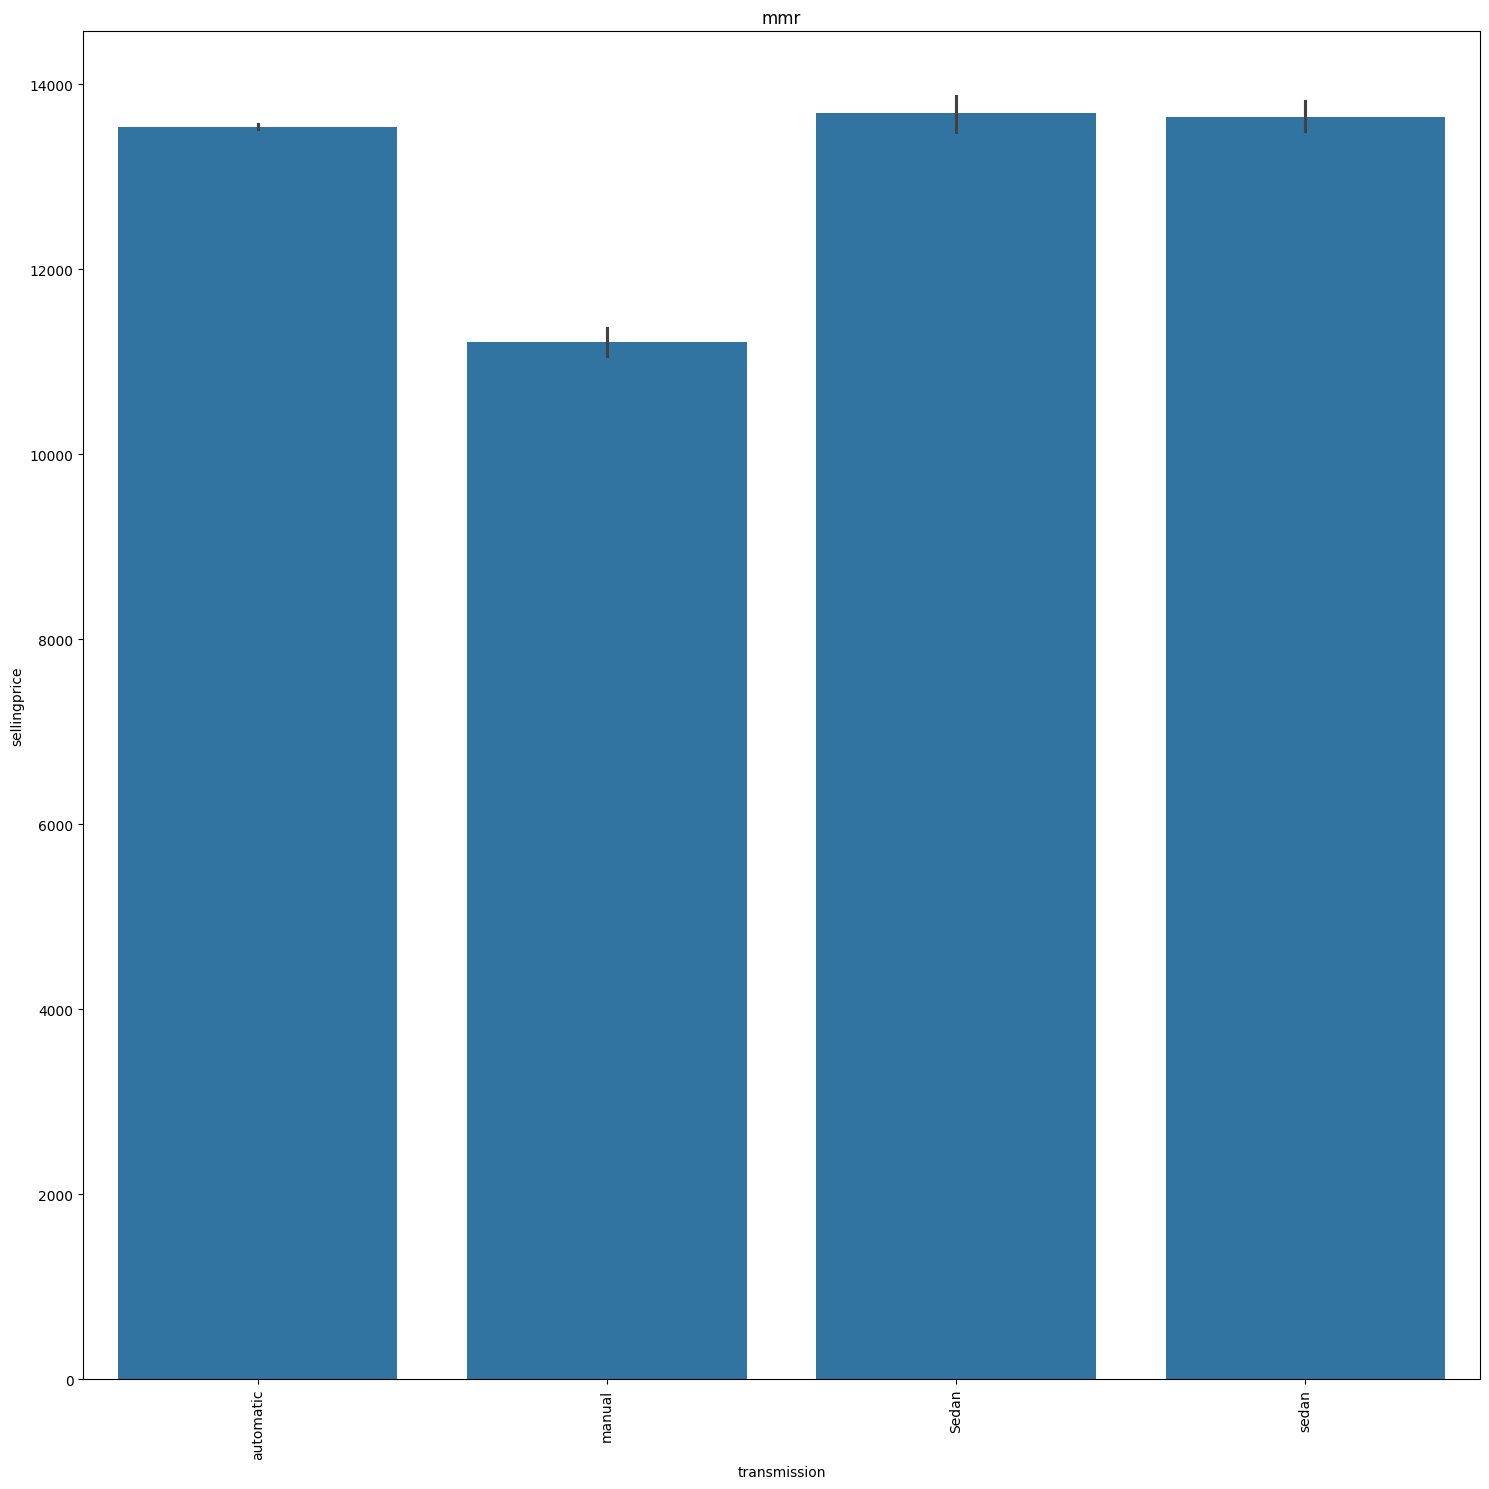

In [597]:
#5.Transmission vs sellingprice
plt.figure(figsize=(15,15))
sns.barplot(x=cars["transmission"],y="sellingprice",data=cars)
plt.title(i)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

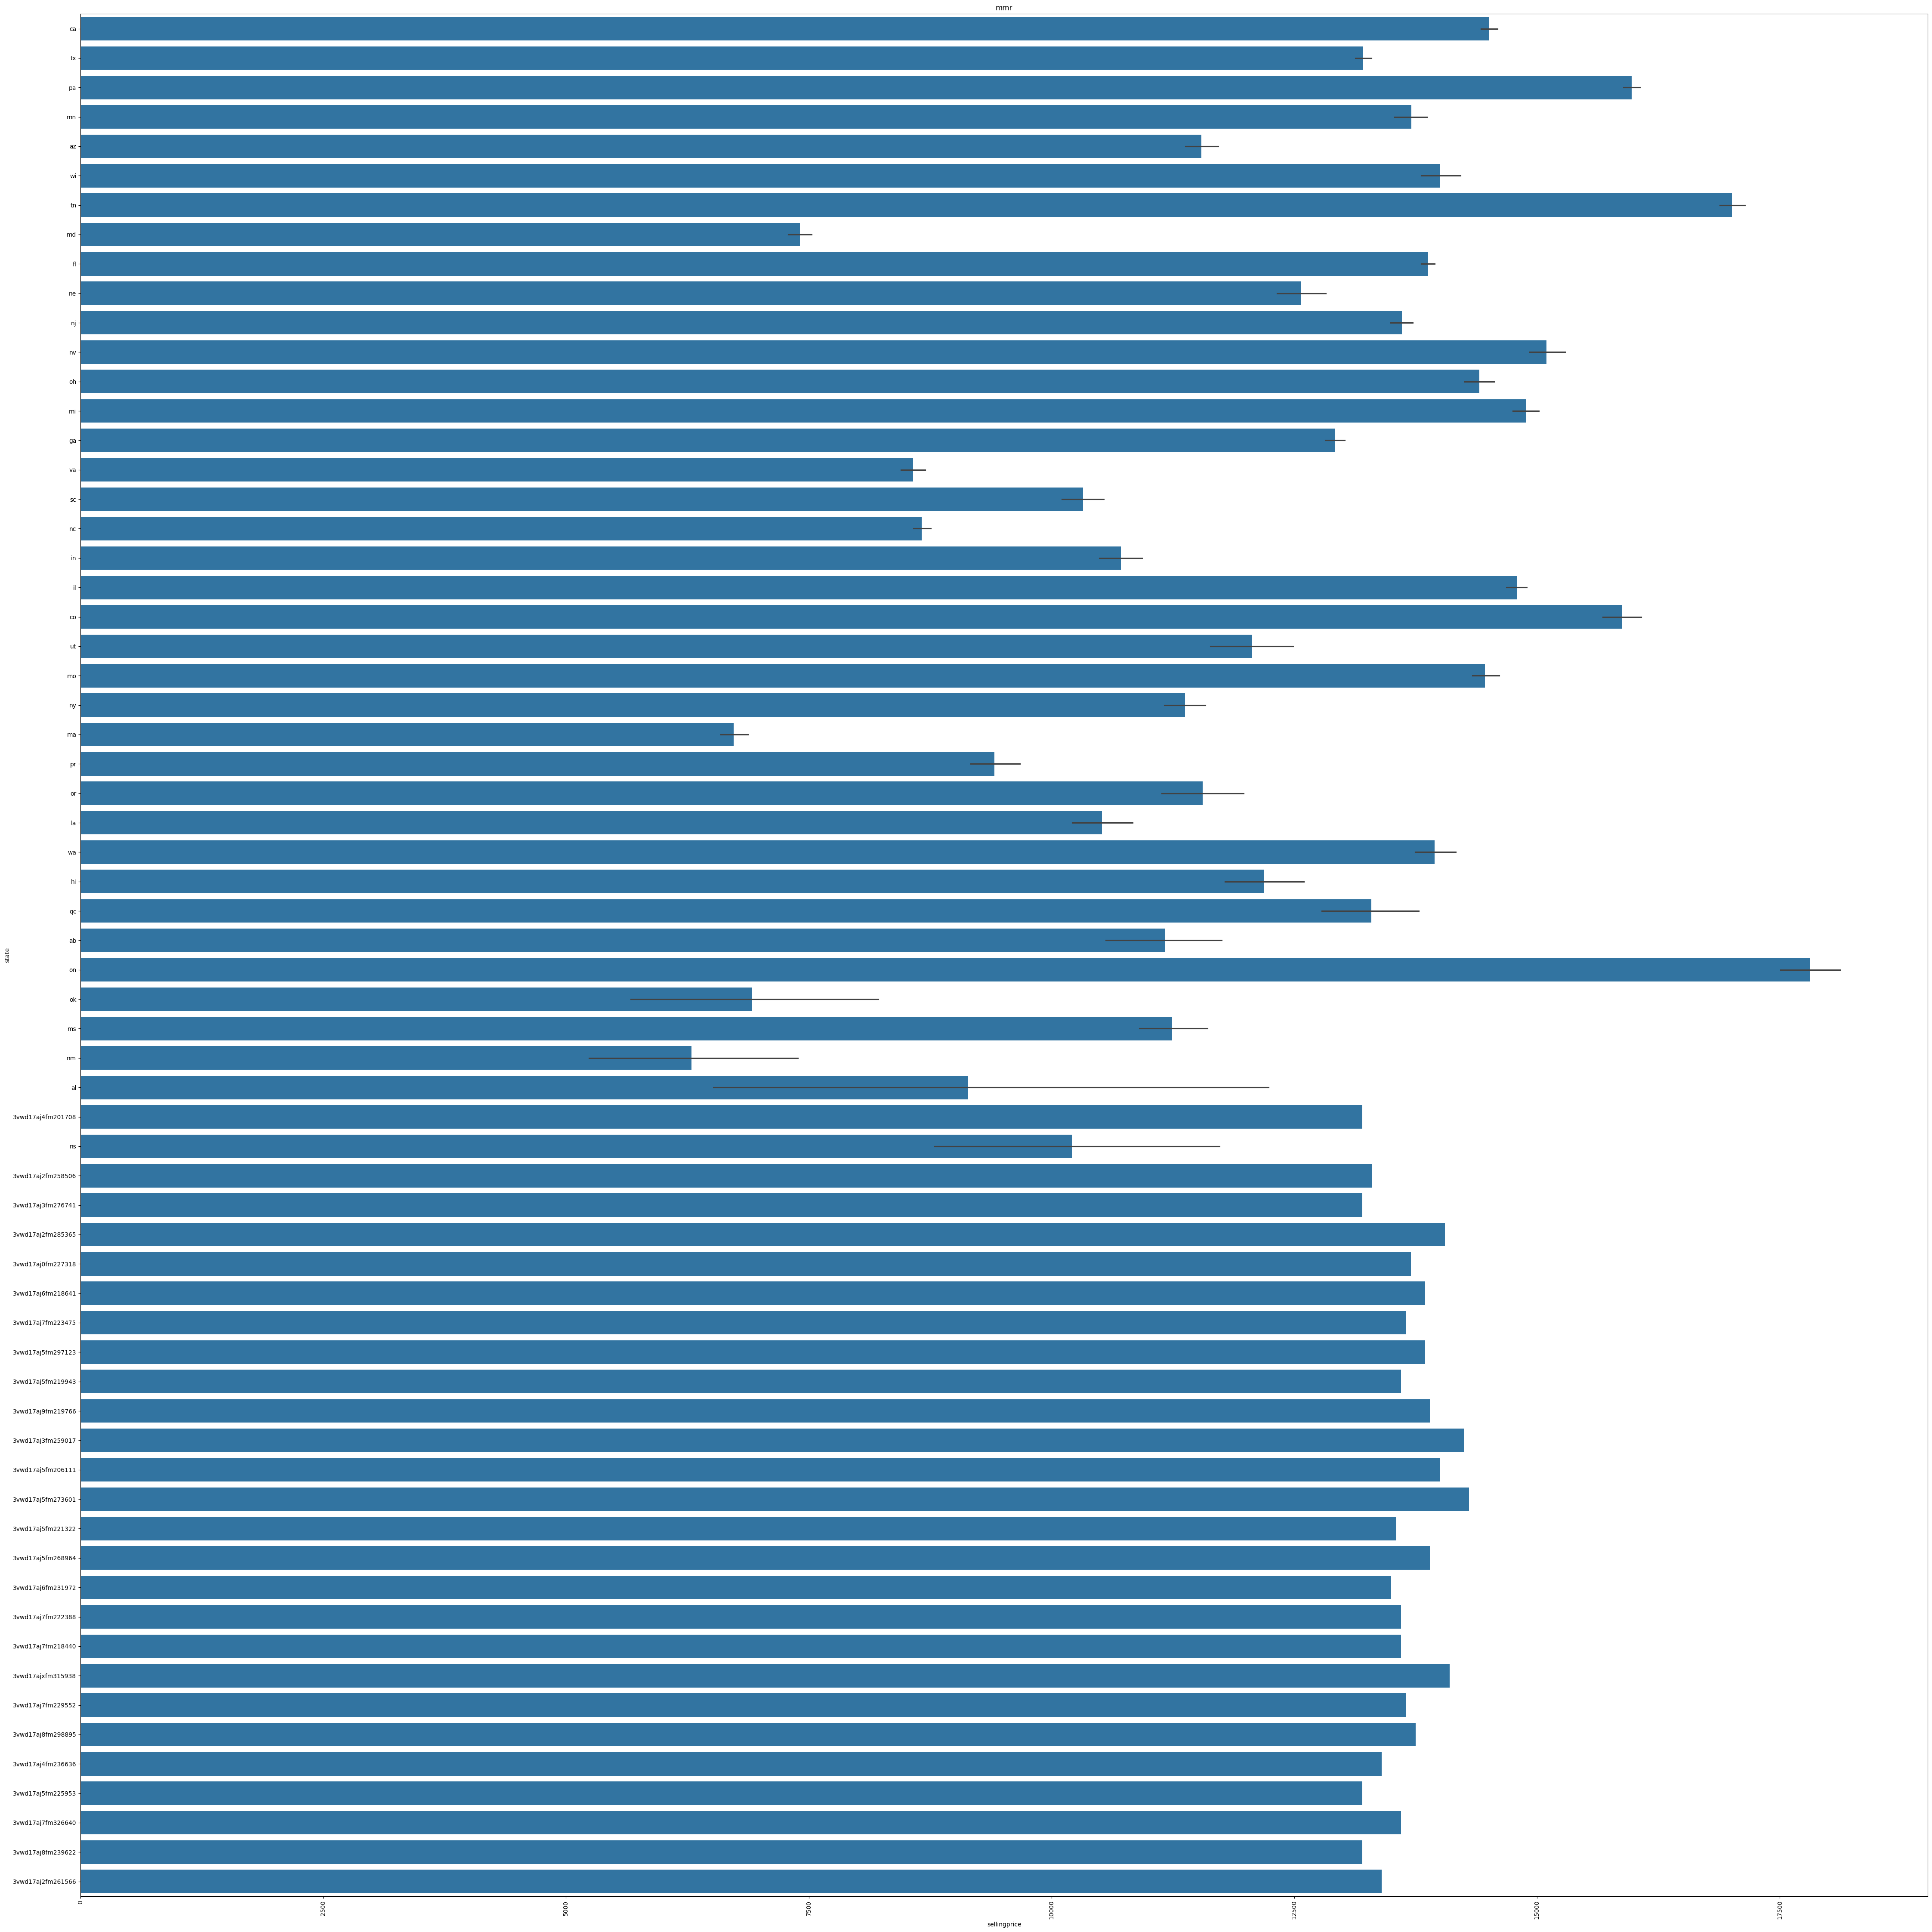

In [598]:
#6.state vs selling price
plt.figure(figsize=(45,45))
sns.barplot(y=cars["state"],x="sellingprice",data=cars)
plt.title(i)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

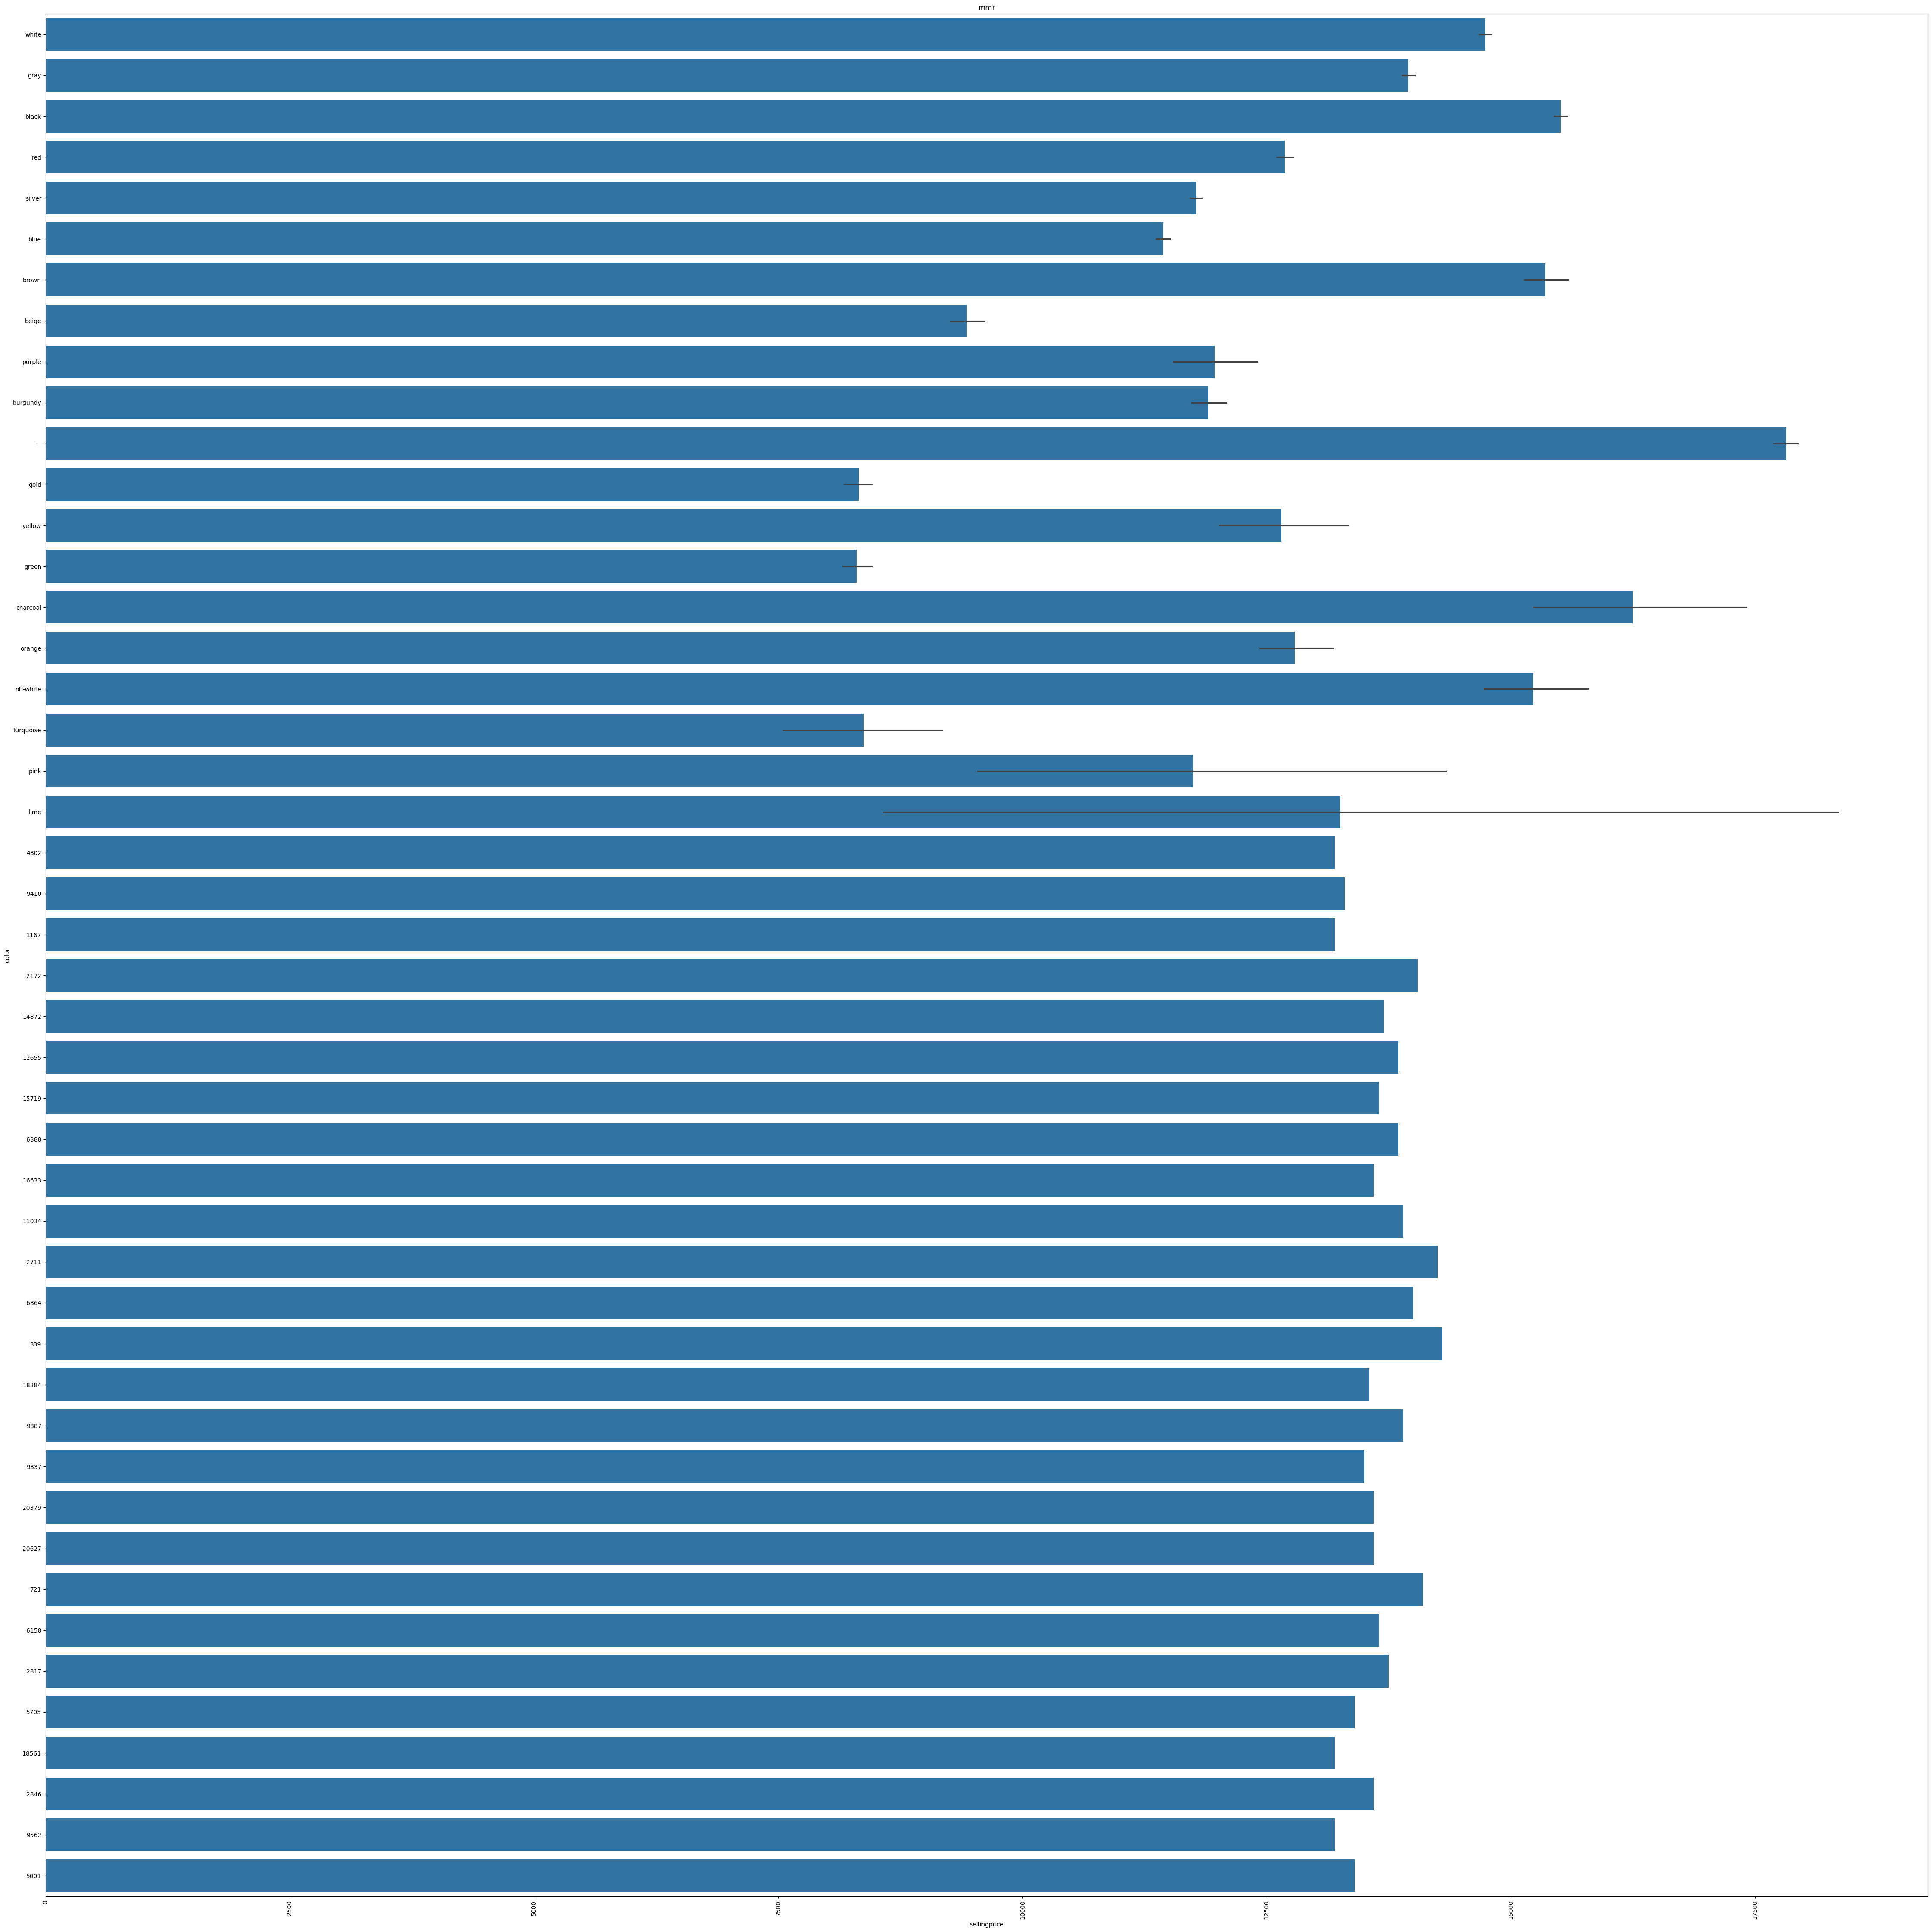

In [599]:
#7.color vs selling price
plt.figure(figsize=(45,45))
sns.barplot(y=cars["color"],x="sellingprice",data=cars)
plt.title(i)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


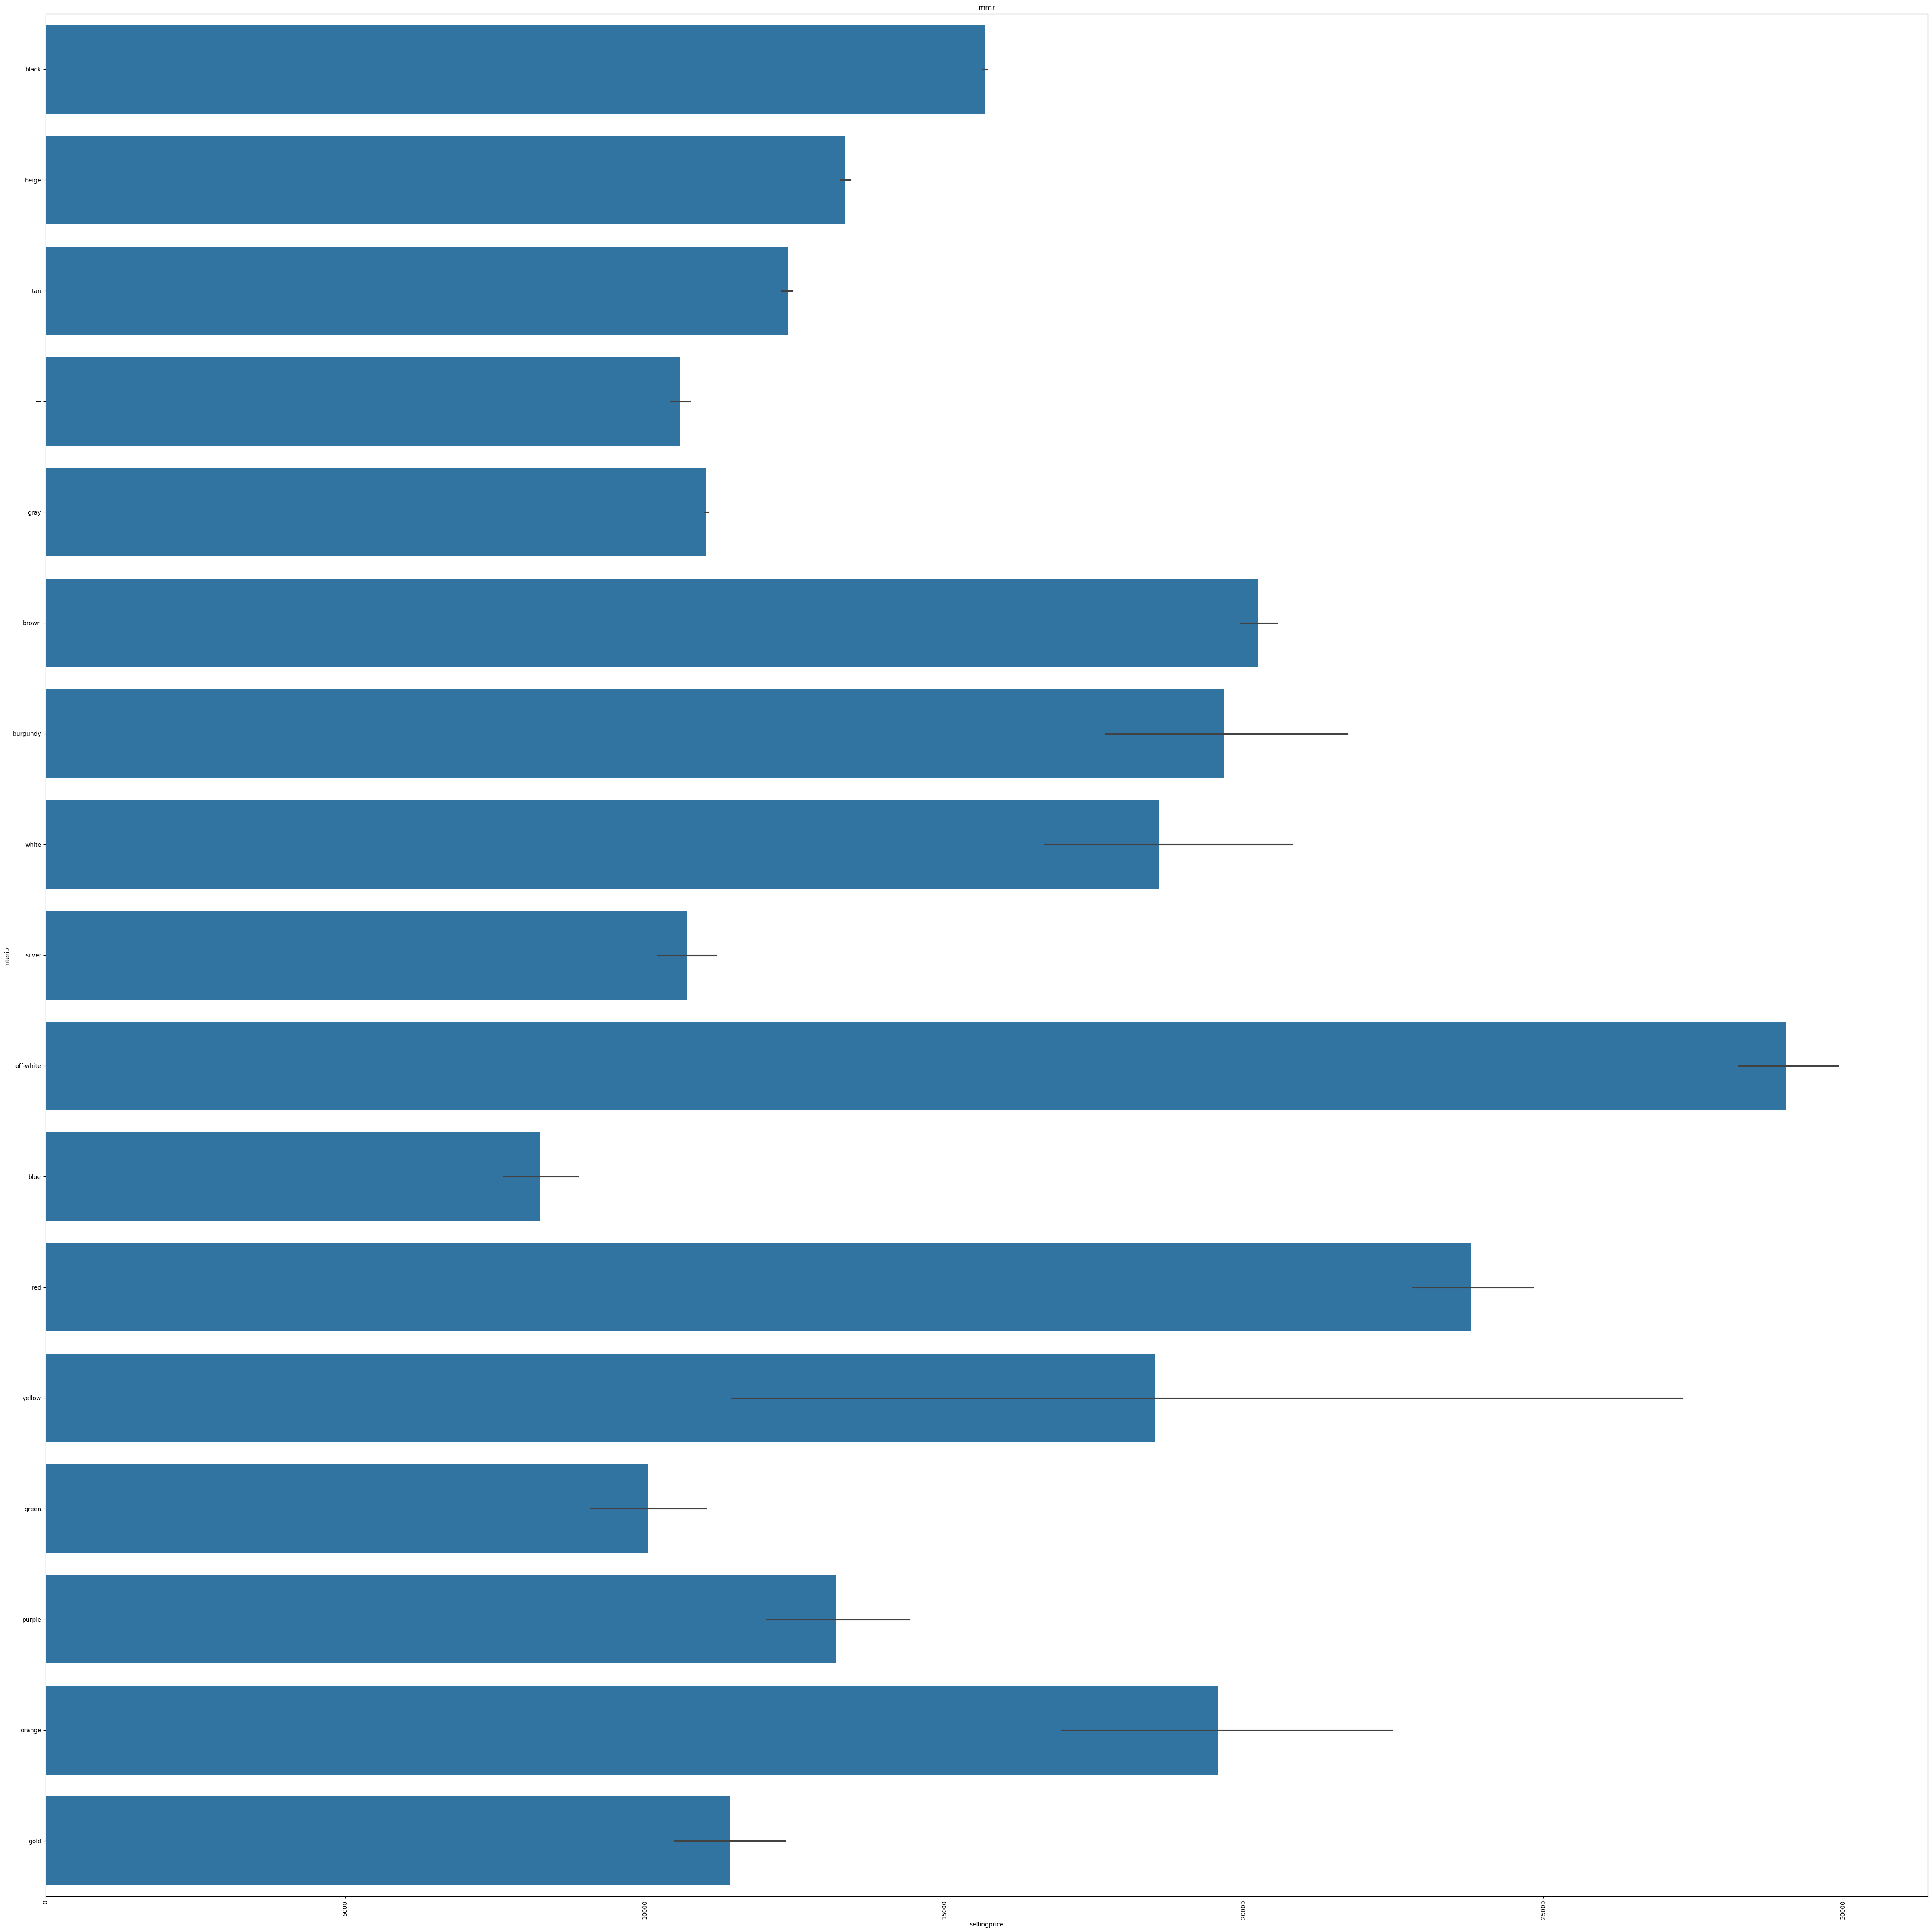

In [600]:

#8.interior vs slling price
plt.figure(figsize=(45,45))
sns.barplot(y=cars["interior"],x="sellingprice",data=cars)
plt.title(i)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

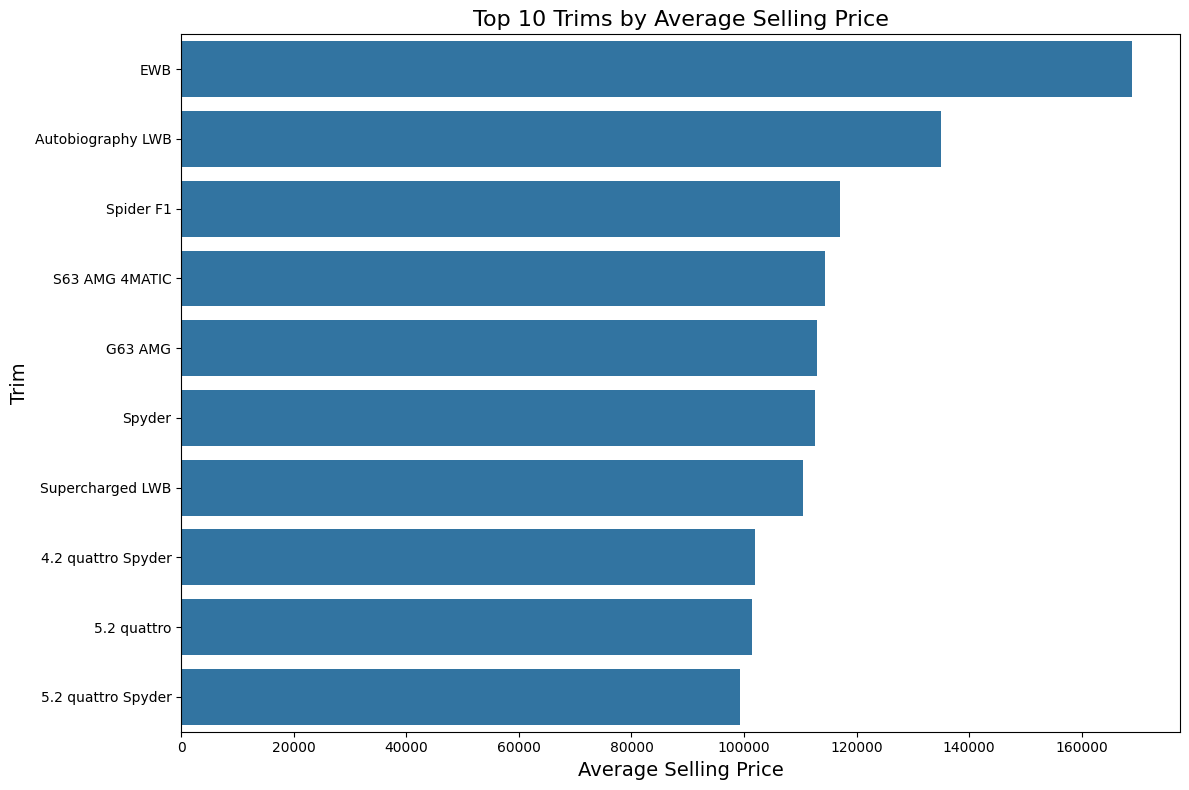

In [601]:
# Calculate the average selling price for each trim
top_trims = cars.groupby("trim")["sellingprice"].mean().sort_values(ascending=False).head(10)

# Reset index to make it easier to plot
top_trims = top_trims.reset_index()

# Plotting the top 10 trims
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.barplot(y=top_trims["trim"], x=top_trims["sellingprice"], data=top_trims)
plt.title("Top 10 Trims by Average Selling Price", fontsize=16)
plt.xlabel("Average Selling Price", fontsize=14)
plt.ylabel("Trim", fontsize=14)
plt.xticks(rotation=0)  # No need to rotate as it's y-axis
plt.tight_layout()
plt.show()

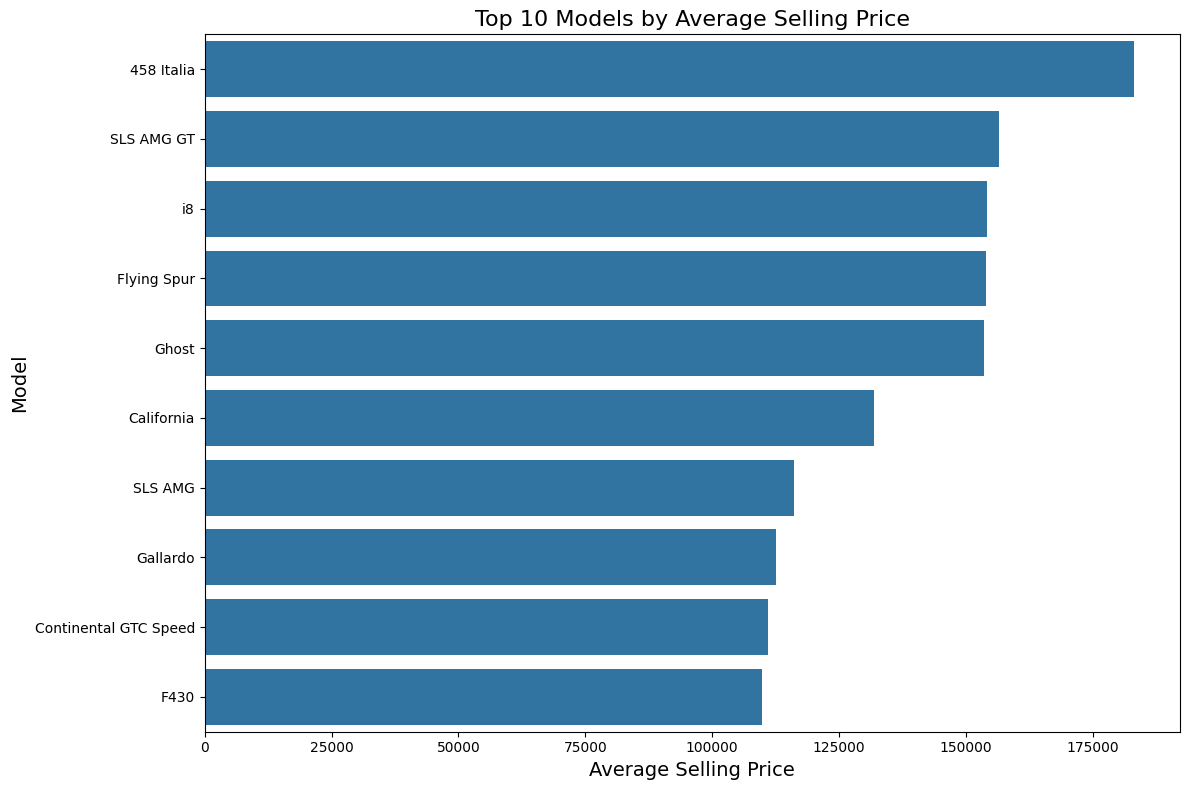

In [602]:
# Calculate the average selling price for each model
top_models = cars.groupby("model")["sellingprice"].mean().sort_values(ascending=False).head(10)

# Reset index to make it easier to plot
top_models = top_models.reset_index()

# Plotting the top 10 models
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.barplot(y=top_models["model"], x=top_models["sellingprice"], data=top_models)
plt.title("Top 10 Models by Average Selling Price", fontsize=16)
plt.xlabel("Average Selling Price", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.xticks(rotation=0)  # No need to rotate as it's y-axis
plt.tight_layout()
plt.show()

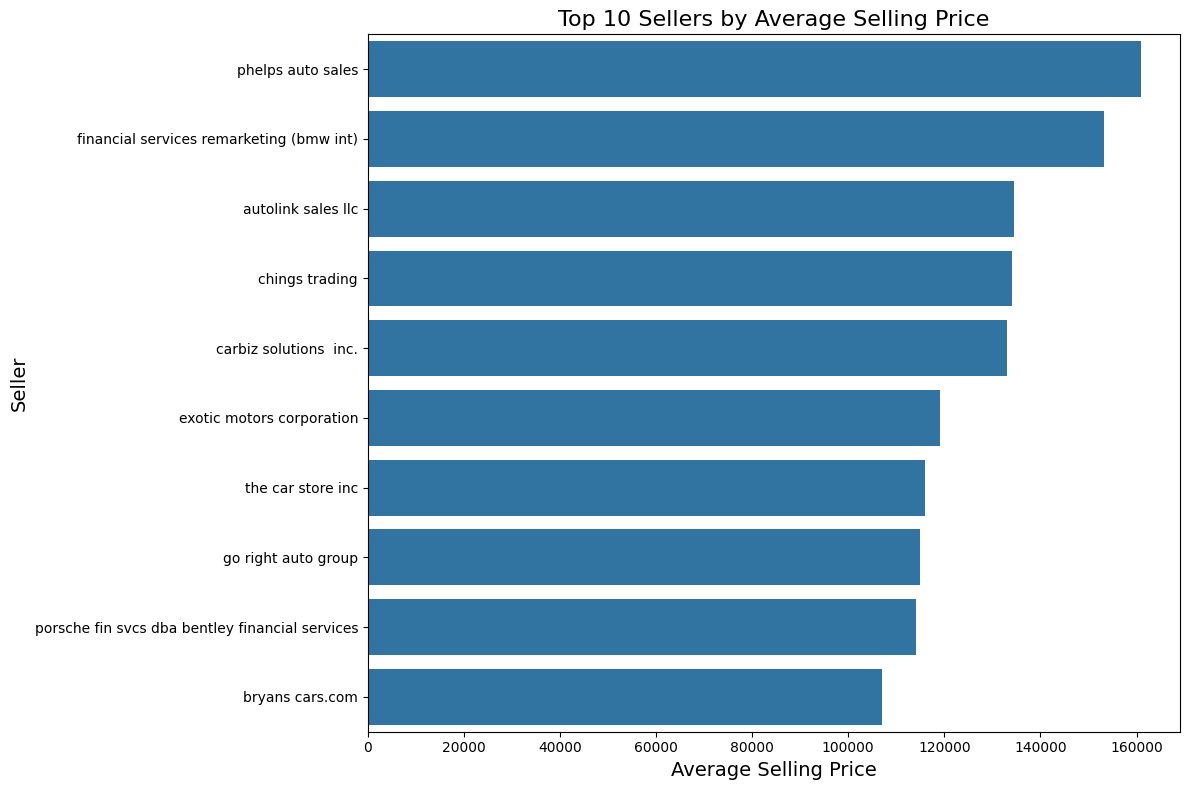

In [603]:
# Calculate the average selling price for each seller
top_sellers = cars.groupby("seller")["sellingprice"].mean().sort_values(ascending=False).head(10)

# Reset index to make it easier to plot
top_sellers = top_sellers.reset_index()

# Plotting the top 10 sellers
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.barplot(y=top_sellers["seller"], x=top_sellers["sellingprice"], data=top_sellers)
plt.title("Top 10 Sellers by Average Selling Price", fontsize=16)
plt.xlabel("Average Selling Price", fontsize=14)
plt.ylabel("Seller", fontsize=14)
plt.xticks(rotation=0)  # No need to rotate as it's y-axis
plt.tight_layout()
plt.show()

#2  Do we have a unique identifier in our data? If yes, please check duplicate rows with respect to this unique identifier?

In [604]:
# The Unique Identifier Is Vin
# 8539 rows × 16 columns


In [605]:
duplicate=cars[cars.duplicated(subset="vin")]


In [606]:
cars["vin"].nunique()

550297

#3 What's the mix of categorical and numerical features? Are there features which are numerical in nature but are represented as categories and vice-versa?

In [607]:

cars.select_dtypes(exclude=np.number).columns.to_list()

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

In [608]:
cars.select_dtypes(include=np.number).columns.to_list()

['year', 'condition', 'odometer', 'mmr', 'sellingprice']

In [609]:
cat=['year', 'condition','make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

In [610]:
num=[ 'odometer', 'mmr', 'sellingprice']

In [611]:
# Year and Condition is wrongly categorized as numerical  but its categorical

4) Do we have missing values? Over and above Nan’s do we also have Unknowns or special characters suggesting missing data? Quantify these by features.

In [612]:
# MISSING VALUES


# df = pd.DataFrame(cars)

# # Define placeholders for missing values
# missing_placeholders = [np.nan, "Unknown", "?", "-"]

# # Identify missing values in the entire DataFrame
# missing_matrix = df.isna() | df.isin(missing_placeholders)

# # Count missing values per column
# missing_counts = missing_matrix.sum(axis=0)

# # Calculate the percentage of missing values
# missing_percentages = (missing_counts / len(df)) * 100

# # Combine results into a summary DataFrame
# missing_summary = pd.DataFrame({
#     'Feature': df.columns,
#     'Missing Count': missing_counts.values,
#     'Missing Percentage': missing_percentages.values
# })

# print(missing_summary)


In [613]:
cars = pd.DataFrame(cars)

# Define placeholders for missing data
missing_placeholders = [np.nan, None, "Unknown", "?", "-", ""]


# Function to count missing values (NaN, placeholders, special characters) in a column
def count_missing_values(column):
    # Count NaN and placeholders
    missing_count = column.isna().sum() + column.isin(missing_placeholders).sum()


    return missing_count

# Apply the function to each column
missing_counts = cars.apply(count_missing_values)

# Combine results into a summary DataFrame
missing_summary = pd.DataFrame({
    'Feature': cars.columns,
    'Missing Count': missing_counts.values
})

print(missing_summary)

         Feature  Missing Count
0           year              0
1           make          20602
2          model          20798
3           trim          21302
4           body          26390
5   transmission         130704
6            vin              8
7          state              0
8      condition          23640
9       odometer            188
10         color           1498
11      interior           1498
12        seller              0
13           mmr             76
14  sellingprice             24
15      saledate             24


In [614]:
cars.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
558832    1
558833    0
558834    0
558835    0
558836    0
Length: 558837, dtype: int64

In [615]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [616]:
cars["transmission"].value_counts(normalize=True)

transmission
automatic    0.964396
manual       0.035551
sedan        0.000030
Sedan        0.000022
Name: proportion, dtype: float64

<Axes: >

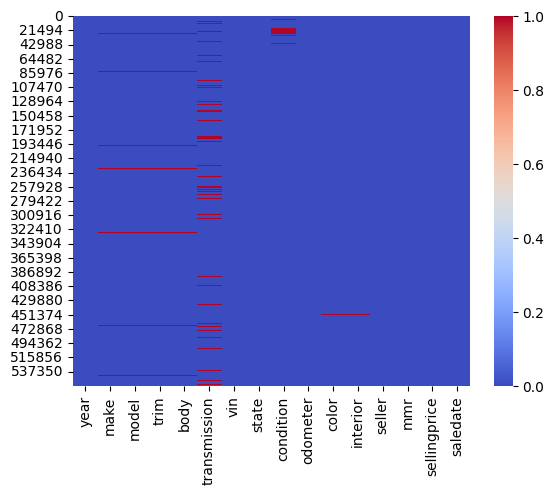

In [617]:
sns.heatmap(cars.isnull(),cmap="coolwarm")

In [618]:
missing_data_summary = pd.DataFrame({
    'Missing (NaN)': cars.isna().sum(),
    'Unknown': cars.apply(lambda x: x.str.contains('unknown', case=False, na=False).sum() if x.dtypes == 'object' else 0),
    'Special Characters': cars.apply(lambda x: x.str.contains(r'[^\w\s]', na=False).sum() if x.dtypes == 'object' else 0)
})

missing_data_summary = missing_data_summary[missing_data_summary.sum(axis=1) > 0]  # Filter features with any missing info

In [619]:
missing_data_summary

,Missing (NaN),Unknown,Special Characters
make,10301,0,17160
model,10399,0,47014
trim,10651,0,73533
body,13195,0,1874
transmission,65352,0,0
vin,4,0,0
condition,11820,0,0
odometer,94,0,0
color,749,0,26134
interior,749,0,17557



5) Do we have outliers or extreme values in our data? How many features contain outliers and how many outliers are there in each feature?

In [620]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, features):
    outliers_summary = {}
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((data[feature] < lower_bound) | (data[feature] > upper_bound)).sum()
        outliers_summary[feature] = outliers
    return outliers_summary
    # Identif
# Identify numerical columns
num=cars.select_dtypes(include=['number']).columns

# Detect outliers
outliers = detect_outliers_iqr(cars, num)

# Print results
print("Outliers Summary:")
for feature, count in outliers.items():
    print(f"Feature '{feature}' has {count} outliers.")

Outliers Summary:
Feature 'year' has 4021 outliers.
Feature 'condition' has 0 outliers.
Feature 'odometer' has 10375 outliers.
Feature 'mmr' has 16315 outliers.
Feature 'sellingprice' has 16354 outliers.


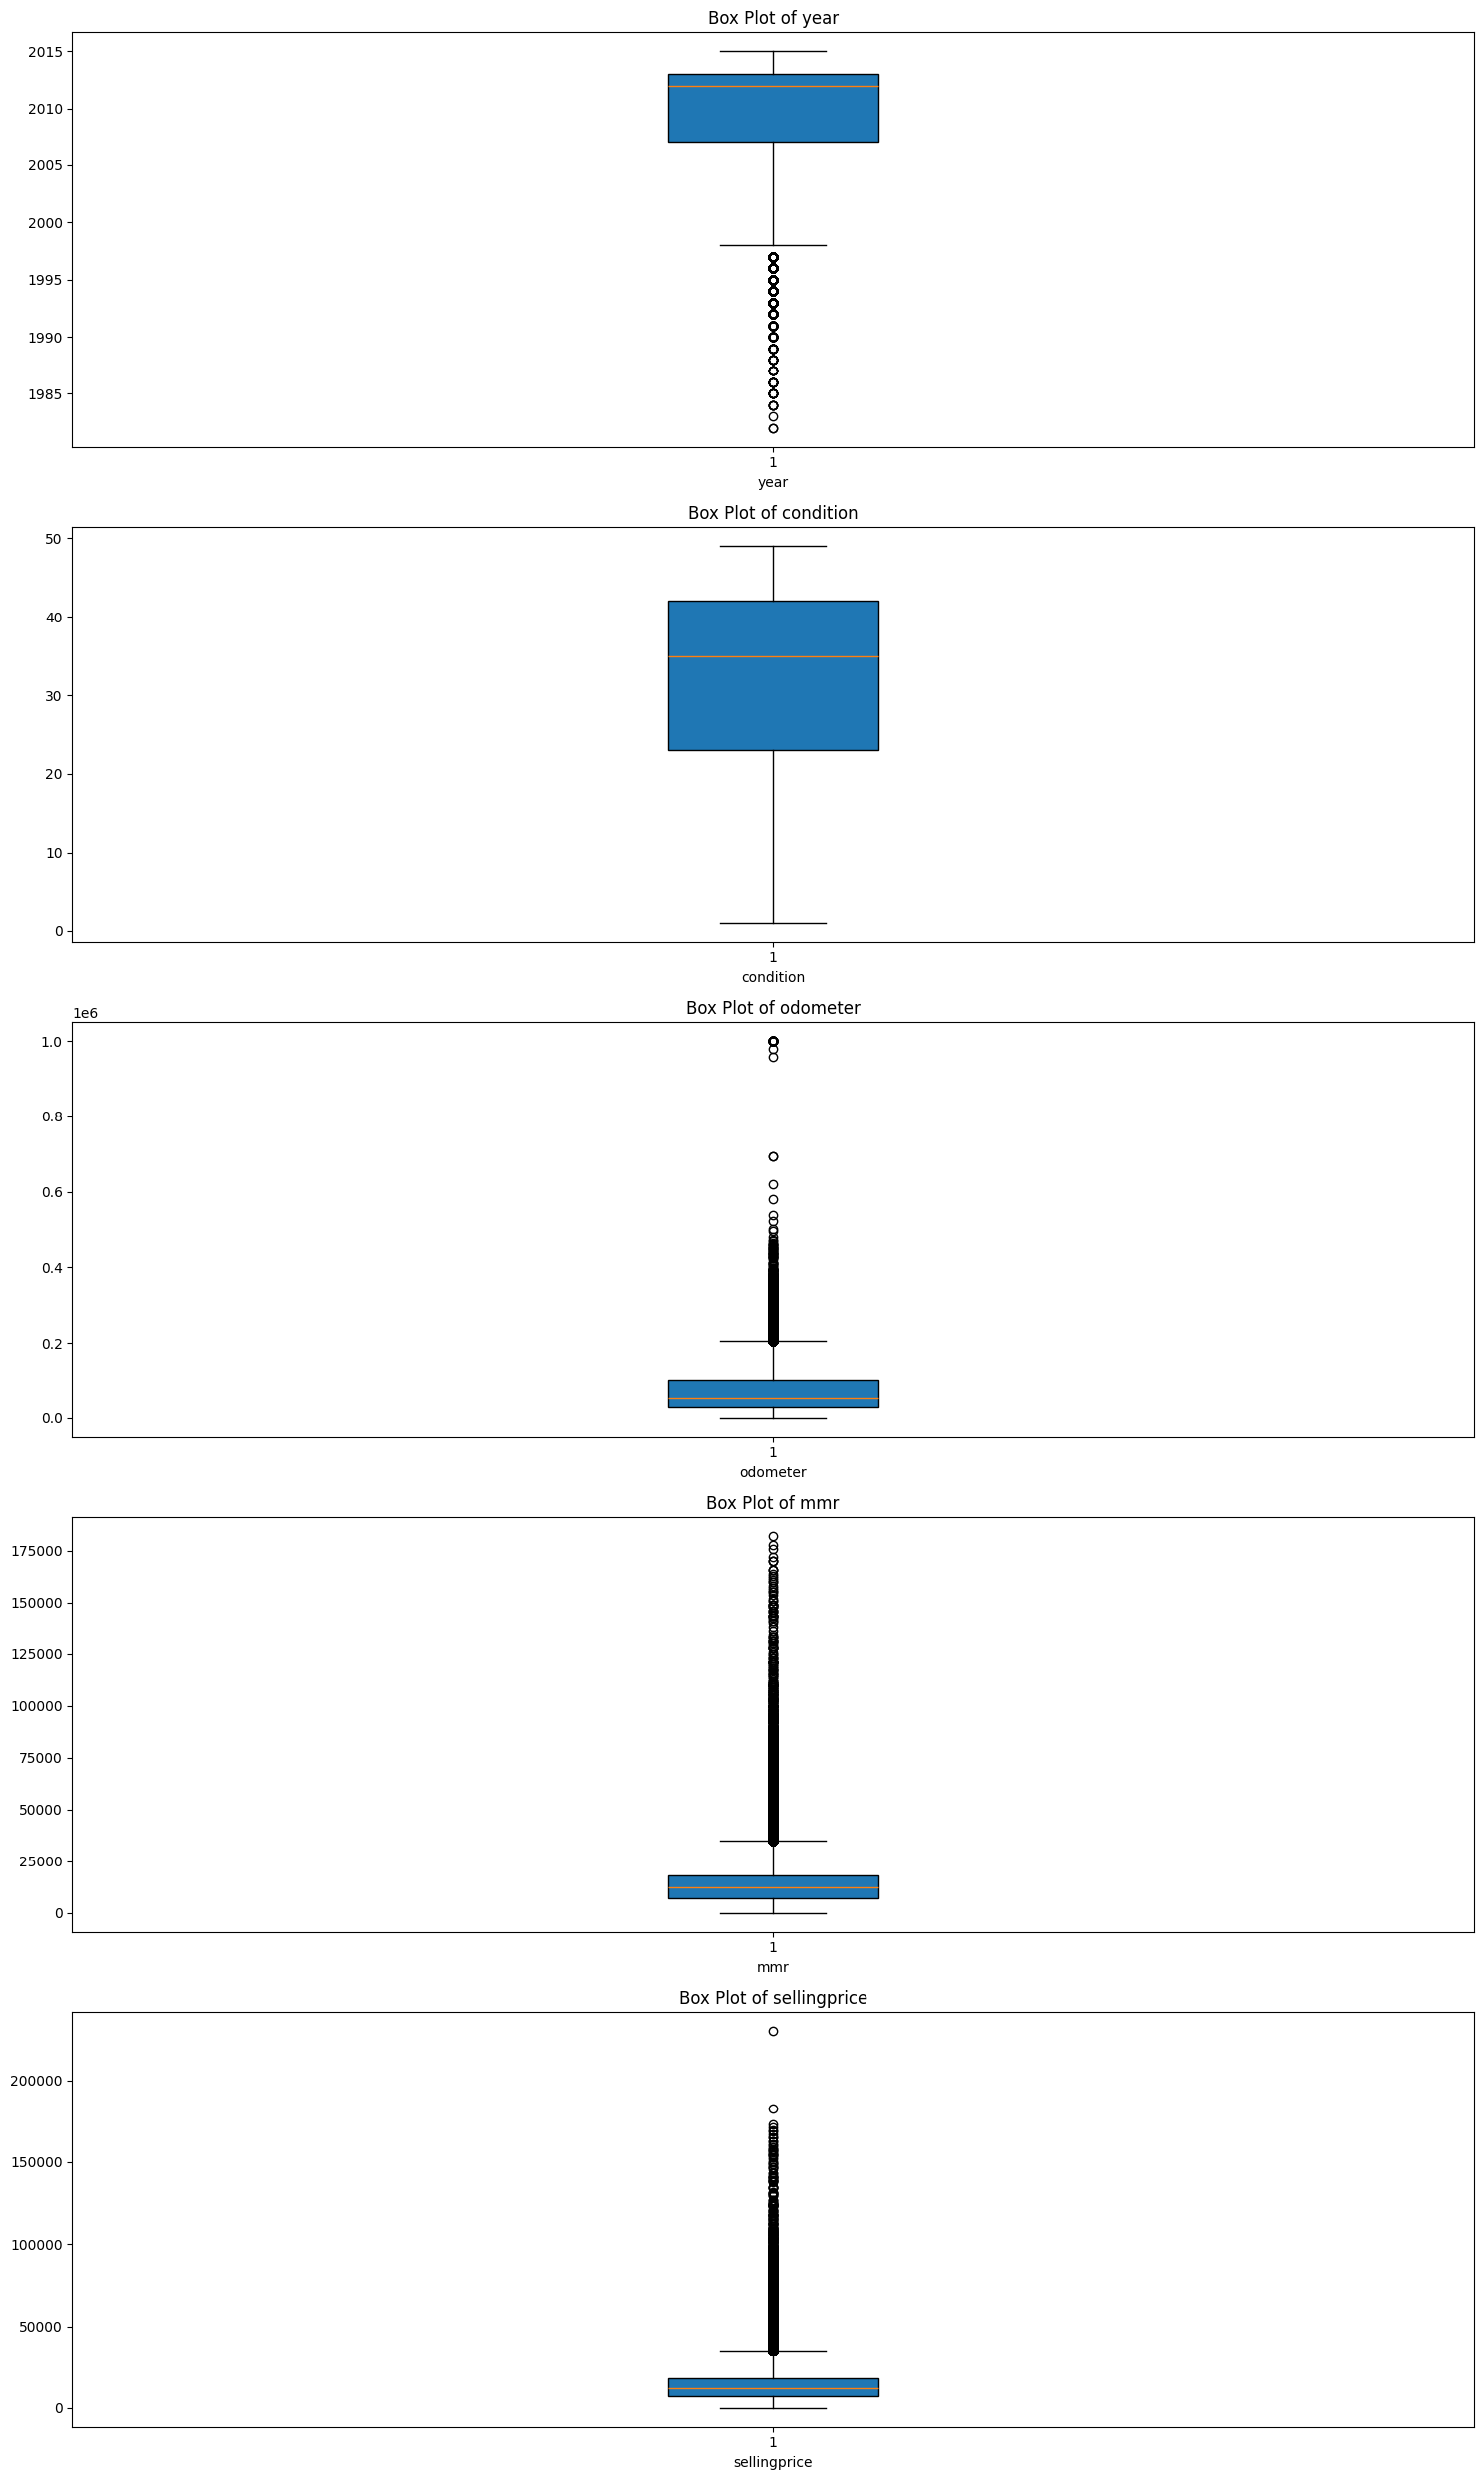

In [621]:
import matplotlib.pyplot as plt

# Function to plot box plots for numerical features
def plot_boxplots(data, features):
    plt.figure(figsize=(15, len(features) * 5))  # Adjust figure size based on the number of features
    for idx, feature in enumerate(features):
        plt.subplot(len(features), 1, idx + 1)  # Create subplots for each feature
        plt.boxplot(data[feature].dropna(), vert=True, patch_artist=True)
        plt.title(f'Box Plot of {feature}')
        plt.xlabel(feature)
    plt.tight_layout()  # Adjust layout for better visualization
    plt.show()

# Call the function for numerical features
plot_boxplots(cars, num)

In [622]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0


6) Is there a magnitude difference between numerical features? Do we need scaling?

In [623]:
##By checking descriptive statistics,visualisations we can determine if there are any
# significant magnitude difference between numerical features

In [624]:
cars.describe()
# WE HAVE MAGNITUDE DIFFERNCE IN MMR,ODOMETER,SELLINGPRICE


,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [625]:
from warnings import filterwarnings
warnings.filterwarnings("ignore")

In [626]:
# ##Visualisations
# num
# k=1
# plt.figure(figsize=(15,15))
# for i in num:
#     plt.subplot(1,3,k)
#     sns.boxplot(y=i,data=cars)
#     plt.title(i)
#     k+=1
# plt.tight_layout()
# plt.show()

# Calculate cardinality (number of unique values) for each categorical feature


In [627]:
for col in cars.columns:
    print(f"\n unique values for '{col}':")
    print(cars[col].nunique())


 unique values for 'year':
34

 unique values for 'make':
96

 unique values for 'model':
973

 unique values for 'trim':
1963

 unique values for 'body':
87

 unique values for 'transmission':
4

 unique values for 'vin':
550297

 unique values for 'state':
64

 unique values for 'condition':
41

 unique values for 'odometer':
172278

 unique values for 'color':
46

 unique values for 'interior':
17

 unique values for 'seller':
14263

 unique values for 'mmr':
1101

 unique values for 'sellingprice':
1887

 unique values for 'saledate':
3766


In [628]:
for col in cars.columns:
    print(f"\nNormalized value counts for '{col}':")
    print(cars[col].value_counts(normalize=True))


Normalized value counts for 'year':
year
2012    0.183086
2013    0.175665
2014    0.145069
2011    0.086873
2008    0.056371
2007    0.055195
2006    0.048159
2010    0.047393
2005    0.038283
2009    0.036852
2004    0.031032
2003    0.023765
2002    0.017384
2015    0.016887
2001    0.011574
2000    0.009353
1999    0.006018
1998    0.003845
1997    0.002766
1996    0.001523
1995    0.001272
1994    0.000701
1993    0.000367
1992    0.000236
1991    0.000120
1990    0.000088
1989    0.000036
1986    0.000020
1988    0.000020
1985    0.000018
1987    0.000014
1984    0.000009
1982    0.000004
1983    0.000002
Name: proportion, dtype: float64

Normalized value counts for 'make':
make
Ford          0.170552
Chevrolet     0.109741
Nissan        0.098345
Toyota        0.072686
Dodge         0.055985
                ...   
airstream     0.000002
ford tk       0.000002
chev truck    0.000002
hyundai tk    0.000002
Lotus         0.000002
Name: proportion, Length: 96, dtype: float64

Normal

In [629]:
cars["color"].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

8) Do we have multicollinearity i.e. correlation between numerical features? - Check pair plot and then correlation matrix.


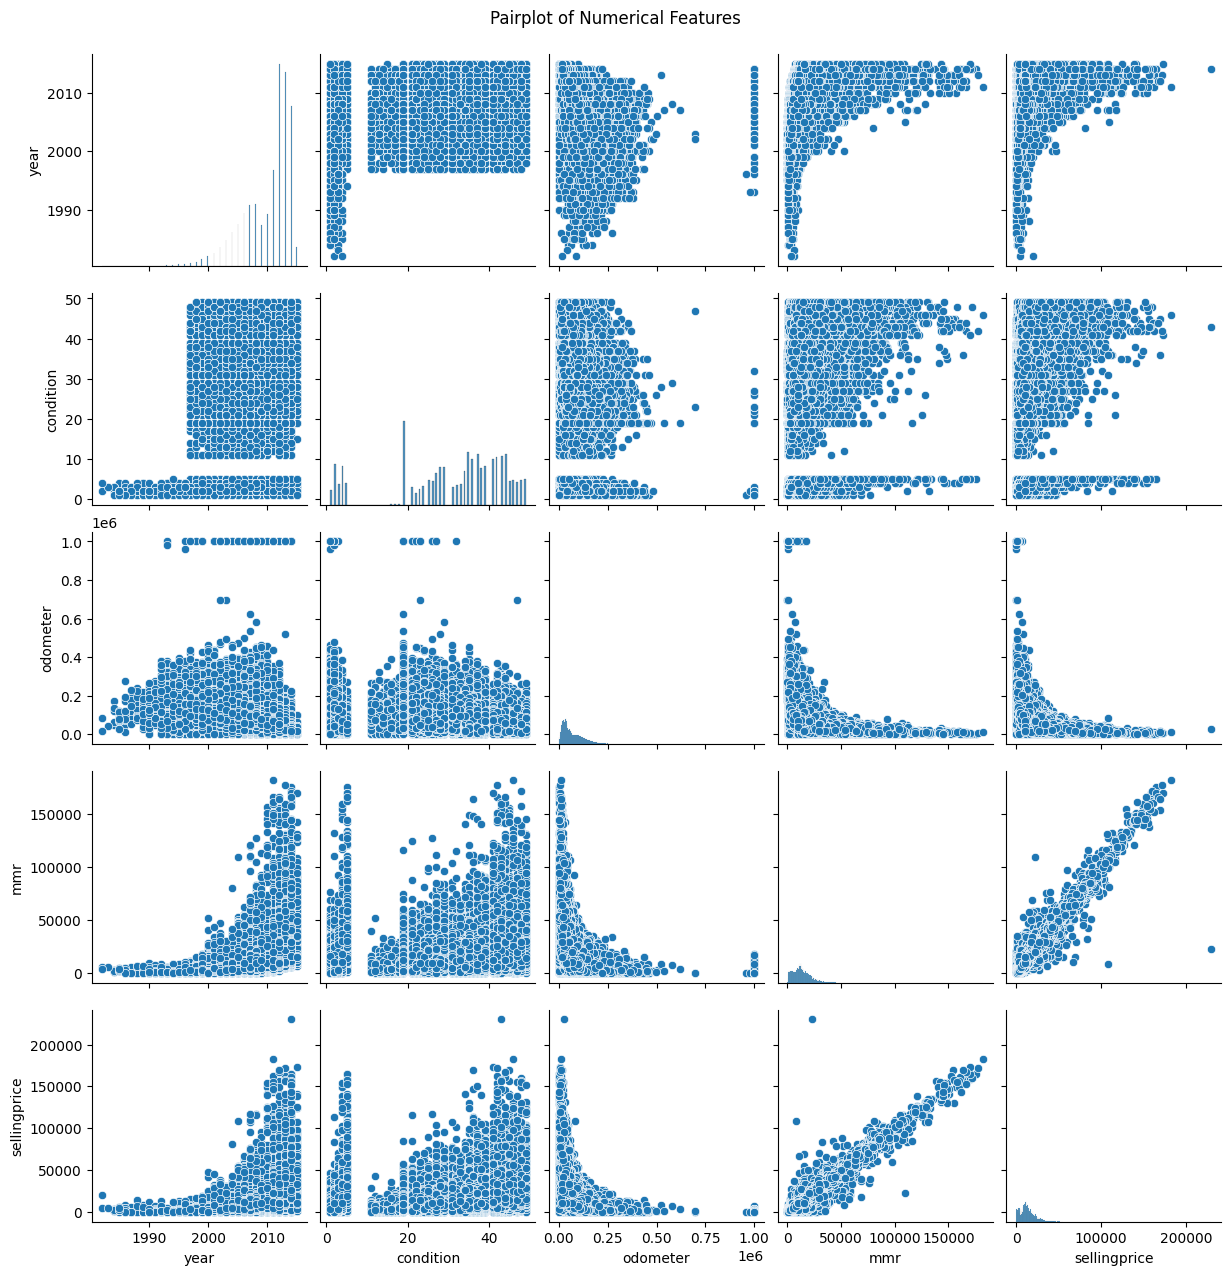

In [630]:

sns.pairplot(cars[num])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()



In [631]:
correlation_matrix = cars[num].corr()
correlation_matrix

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.340320,-0.772737,0.596631,0.586480
condition,0.340320,1.000000,-0.318188,0.281415,0.321944
odometer,-0.772737,-0.318188,1.000000,-0.588113,-0.582393
mmr,0.596631,0.281415,-0.588113,1.000000,0.983635
sellingprice,0.586480,0.321944,-0.582393,0.983635,1.000000


9) Generate 10 to 12 hypothesis statements pairing independent features with the target column

Hypothesis 1: The "year" of manufacture is positively correlated with the "sellingprice".
* Hypothesis 2: The "model" of the car influences the "sellingprice".
: Different car models have different market values based on features, popularity, and age.  
* Hypothesis 3: The "color" of the car impacts its "sellingprice".: Certain colors may be in higher demand, such as neutral tones (black, white) vs. unique colors.
* Hypothesis 4: The "body" type (e.g., Sedan, SUV) is correlated with the "sellingprice".
* Hypothesis 5: Cars with lower "odometer" readings will have a higher "sellingprice".
* Hypothesis 6: The "seller" type (e.g., dealer vs. individual) has an impact on the "sellingprice".
* Hypothesis 7: Transmission Type:Vehicles with automatic transmission tend to have a higher sellingprice compared to those with manual transmission due to higher demand.
* Hypothesis 8 : Condition: Cars in better condition (e.g., excellent vs. fair) are associated with higher sellingprice.
* Hypothesis 9: Trim:Cars with higher-end trim levels (e.g., luxury or sport) command a higher sellingprice
* Hypothesis 10: VIN (Vehicle Identification Number):Specific patterns in the vin may correlate with higher sellingprice due to unique attributes or history tied to the vehicle.
* Hypothesis 11: State :The state where the car is sold influences the sellingprice, with certain regions (e.g., urban areas) having higher prices due to demand.
* Hypothesis 12: MMR (Manheim Market Report) Value: Cars with higher MMR values (mmr) are sold at higher prices, showing a strong correlation.

In [632]:
cars.shape

(558837, 16)

Treating the missing values

In [633]:
cars["make"].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [634]:
clean_df = cars.dropna()


In [635]:
clean_df["make"] = clean_df["make"].apply(str.lower)

In [636]:
clean_df["make"].nunique()

53

In [637]:
cars['make'].value_counts()

make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64

dropping the vin number

In [638]:
clean_df.drop(columns=["vin"],axis=1,inplace=True)

In [639]:
clean_df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [640]:
clean_df.shape,cars.shape

((472325, 15), (558837, 16))

In [641]:
clean_df["transmission"].value_counts()

transmission
automatic    455963
manual        16362
Name: count, dtype: int64

In [642]:
len(clean_df["body"].value_counts())

85

In [643]:
clean_df["body"] = clean_df["body"].apply(str.lower)

In [644]:
len(clean_df["body"].value_counts())

45

In [645]:
clean_df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,Sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,S60,T5,sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 Series Gran Coupe,650i,sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,bmw,5 Series,528i,sedan,automatic,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,ram,2500,Power Wagon,crew cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,bmw,X5,xDrive35d,suv,automatic,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,nissan,Altima,2.5 S,sedan,automatic,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [646]:
clean_df["trim"].value_counts()

trim
Base             48779
SE               39633
LX               18706
Limited          15506
LT               15273
                 ...  
HD LS                1
Luxury II            1
Spider F1            1
Premium Fleet        1
Power Wagon          1
Name: count, Length: 1494, dtype: int64

In [647]:
clean_df.to_csv("clean_df.csv")

changing the datatype of sale date

In [648]:
clean_df["saledate"].dtype

dtype('O')

In [649]:
clean_df['saledate'] = pd.to_datetime(clean_df['saledate'],errors='coerce')

In [650]:
clean_df["saledate"].dtype

dtype('O')

Replacing "-" in color and interior

In [651]:
## color
# Identify the mode of the column (most frequent value)
mode_value = clean_df['color'].mode()[0]

# Replace '—' with the mode value
clean_df['color'] = clean_df['color'].replace('—', mode_value)



In [652]:
## interior

# Identify the mode of the column (most frequent value)
mode_value = clean_df['interior'].mode()[0]

# Replace '—' with the mode value
clean_df['interior'] = clean_df['interior'].replace('—', mode_value)


In [653]:
clean_df["interior"].unique()

array(['black', 'beige', 'tan', 'brown', 'gray', 'burgundy', 'white',
       'silver', 'off-white', 'red', 'yellow', 'green', 'purple', 'blue',
       'orange', 'gold'], dtype=object)

In [654]:
clean_df["color"].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

Feature Engineering

Feature-1 vehicle Age

In [655]:
# Convert 'saledate' to datetime format properly
clean_df['saledate'] = pd.to_datetime(clean_df['saledate'], errors='coerce', utc=True).dt.tz_convert(None)


clean_df['sale_year'] = clean_df['saledate'].dt.year

# Compute vehicle age
clean_df['vehicle_age'] = clean_df['sale_year'] - clean_df['year']

In [656]:
clean_df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,vehicle_age
0,2015,kia,Sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00,2014,-1
1,2015,kia,Sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00,2014,-1
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00,2015,1
3,2015,volvo,S60,T5,sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00,2015,0
4,2014,bmw,6 Series Gran Coupe,650i,sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00,2014,0


In [657]:
clean_df["vehicle_age"].value_counts()

vehicle_age
 2     87964
 3     85124
 1     71142
 4     39437
 7     26953
 8     25071
 5     22254
 9     21189
 6     18646
 10    16870
 11    13318
 0     12148
 12    10189
 13     7396
 14     4993
 15     3323
 16     2147
 17     1442
 18      987
 19      559
 20      450
 21      270
-1       157
 22      132
 23       87
 24       48
 25       29
Name: count, dtype: int64

In [658]:
## converting -1 to zero because year cannot be negative values
clean_df["vehicle_age"] = [0 if age == -1 else age for age in clean_df["vehicle_age"]]

Feature-2 Make

In [659]:
clean_df["make"].value_counts(normalize=True)*100

make
ford             17.151961
chevrolet        11.464564
nissan            9.324723
toyota            7.476420
dodge             5.754724
honda             5.246599
hyundai           3.950458
bmw               3.706981
kia               3.351082
chrysler          3.203938
infiniti          2.966390
mercedes-benz     2.965755
jeep              2.696237
volkswagen        2.282327
lexus             2.203779
gmc               1.951411
mazda             1.467210
cadillac          1.337003
lincoln           1.042926
audi              1.016673
acura             0.953369
buick             0.946382
subaru            0.924999
ram               0.856190
pontiac           0.850685
mitsubishi        0.775102
volvo             0.652517
mini              0.623723
saturn            0.544117
mercury           0.332610
scion             0.327105
land rover        0.279892
jaguar            0.266130
porsche           0.244958
suzuki            0.206849
hummer            0.162600
fiat              0.153

In [660]:
car_makes = {
    "ford", "chevrolet", "nissan", "toyota", "dodge",
    "honda", "hyundai", "bmw", "kia", "chrysler",
    "infiniti", "mercedes-benz"
}

# Replace makes not in the list with 'Other'
clean_df['make'] = clean_df['make'].apply(lambda x: x if x in car_makes else 'Other')

# Display the updated dataset
print(clean_df.head())


   year   make                model        trim   body transmission state  \
0  2015    kia              Sorento          LX    suv    automatic    ca   
1  2015    kia              Sorento          LX    suv    automatic    ca   
2  2014    bmw             3 Series  328i SULEV  sedan    automatic    ca   
3  2015  Other                  S60          T5  sedan    automatic    ca   
4  2014    bmw  6 Series Gran Coupe        650i  sedan    automatic    ca   

   condition  odometer  color interior  \
0        5.0   16639.0  white    black   
1        5.0    9393.0  white    beige   
2       45.0    1331.0   gray    black   
3       41.0   14282.0  white    black   
4       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3           

In [661]:
clean_df["make"].nunique()

13

Feature-3 Body

In [662]:
clean_df["body"].unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'cts coupe', 'supercrew', 'e-series van',
       'extended cab', 'supercab', 'g convertible', 'koup', 'regular cab',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'beetle convertible', 'tsx sport wagon',
       'promaster cargo van', 'cab plus', 'granturismo convertible',
       'cts-v wagon', 'ram van', 'transit van', 'regular-cab'],
      dtype=object)

In [663]:
def categorize_body_type(body):
    if body in ['sedan', 'g sedan', 'elantra coupe']:
        return 'sedan'
    elif body in ['convertible', 'g convertible', 'beetle convertible', 'q60 convertible']:
        return 'convertible'
    elif body in ['coupe', 'g coupe', 'cts coupe', 'cts-v coupe', 'g37 coupe', 'q60 coupe']:
        return 'coupe'
    elif body in ['wagon', 'cts wagon', 'tsx sport wagon']:
        return 'wagon'
    elif body in ['minivan', 'van', 'e-series van', 'transit van', 'ram van']:
        return 'van'
    elif body in ['crew cab', 'double cab', 'crewmax cab', 'king cab', 'supercrew', 
                  'supercab', 'extended cab', 'quad cab', 'xtracab', 'mega cab']:
        return 'truck'
    else:
        return "other"

clean_df['body'] = clean_df['body'].apply(categorize_body_type)

In [664]:
clean_df["body"].value_counts(normalize=True)*100

body
sedan          46.223257
other          31.714392
truck           7.620600
van             5.626846
coupe           3.738316
wagon           3.019531
convertible     2.057058
Name: proportion, dtype: float64

For Transmission the misclassification is rectified when dropping the missing values

Feature-4 State

In [665]:
# Define a function to categorize states into regions
def categorize_state(state):
    east = {'md', 'pa', 'nj', 'va', 'sc', 'nc', 'ny', 'fl', 'pr','ma'}
    west = {'ca', 'az', 'co', 'ut', 'nv', 'wa', 'or', 'hi'}
    north = {'mn', 'wi', 'ne', 'oh', 'mi', 'in', 'il'}
    south = {'tx', 'tn', 'ga', 'al', 'ms', 'la', 'ok', 'nm', 'mo'}
    
    if state in east:
        return "East"
    elif state in west:
        return "West"
    elif state in north:
        return "North"
    elif state in south:
        return "South"
    else:
        return "Unknown"

# Apply the function to the 'state' column
clean_df['Region'] = clean_df['state'].apply(categorize_state)

In [666]:
clean_df["Region"].unique()

array(['West', 'South', 'North', 'East'], dtype=object)

In [667]:
clean_df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,vehicle_age,Region
0,2015,kia,Sorento,LX,other,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00,2014,0,West
1,2015,kia,Sorento,LX,other,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00,2014,0,West
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00,2015,1,West
3,2015,Other,S60,T5,sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00,2015,0,West
4,2014,bmw,6 Series Gran Coupe,650i,sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00,2014,0,West


Feature-5 Color

In [668]:
clean_df['color'].value_counts(normalize=True)*100

color
black        24.413698
white        18.892288
silver       15.085164
gray         14.955804
blue          9.116604
red           7.904727
gold          2.024665
green         1.955010
burgundy      1.610120
beige         1.576033
brown         1.190070
orange        0.373260
purple        0.268883
off-white     0.263378
yellow        0.228444
charcoal      0.090827
turquoise     0.040227
pink          0.008257
lime          0.002541
Name: proportion, dtype: float64

In [669]:
#Taking the 80% of the color and categorizing the rest as other
primary_colors = ['black', 'white', 'silver', 'gray', 'blue']
clean_df['color'] = clean_df['color'].apply(lambda x: x if x in primary_colors else 'other')

Feature-6 Interior

In [670]:
clean_df['interior'].value_counts(normalize=True)*100

interior
black        46.520722
gray         32.311650
beige        10.685227
tan           7.986662
brown         1.503626
red           0.238819
silver        0.212142
blue          0.194146
off-white     0.075160
gold          0.060975
purple        0.060763
white         0.044884
green         0.042344
burgundy      0.032605
orange        0.026253
yellow        0.004023
Name: proportion, dtype: float64

In [671]:
primary_colors = ['black', 'gray','beige']
clean_df['interior'] = clean_df['interior'].apply(lambda x: x if x in primary_colors else 'other')

In [676]:
clean_df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,vehicle_age,Region
0,2015,kia,Sorento,LX,other,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00,2014,0,West
1,2015,kia,Sorento,LX,other,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00,2014,0,West
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00,2015,1,West
3,2015,Other,S60,T5,sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00,2015,0,West
4,2014,bmw,6 Series Gran Coupe,650i,sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00,2014,0,West


Feature-7 Seller

In [677]:
# Define function to categorize sellers
def seller_category(seller, make):
    if str(make).lower() in str(seller).lower():
        return "Manufacturer"
    else:
        return "Private Dealer"

# Apply function to categorize sellers
clean_df['seller_category'] = clean_df.apply(lambda row: seller_category(row['seller'], row['make']), axis=1)

In [678]:
clean_df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year,vehicle_age,Region,seller_category
0,2015,kia,Sorento,LX,other,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00,2014,0,West,Manufacturer
1,2015,kia,Sorento,LX,other,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00,2014,0,West,Manufacturer
2,2014,bmw,3 Series,328i SULEV,sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00,2015,1,West,Private Dealer
3,2015,Other,S60,T5,sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00,2015,0,West,Private Dealer
4,2014,bmw,6 Series Gran Coupe,650i,sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00,2014,0,West,Private Dealer


Dropping the columns

In [679]:
clean_df.drop(columns=["year","model","trim","seller","state","saledate","sale_year"],axis=1,inplace=True)

In [682]:
clean_df

,make,body,transmission,condition,odometer,color,interior,mmr,sellingprice,vehicle_age,Region,seller_category
0,kia,other,automatic,5.0,16639.0,white,black,20500.0,21500.0,0,West,Manufacturer
1,kia,other,automatic,5.0,9393.0,white,beige,20800.0,21500.0,0,West,Manufacturer
2,bmw,sedan,automatic,45.0,1331.0,gray,black,31900.0,30000.0,1,West,Private Dealer
3,Other,sedan,automatic,41.0,14282.0,white,black,27500.0,27750.0,0,West,Private Dealer
4,bmw,sedan,automatic,43.0,2641.0,gray,black,66000.0,67000.0,0,West,Private Dealer
...,...,...,...,...,...,...,...,...,...,...,...,...
558831,bmw,sedan,automatic,39.0,66403.0,white,other,20300.0,22800.0,4,East,Manufacturer
558833,Other,truck,automatic,5.0,54393.0,white,black,30200.0,30800.0,3,West,Private Dealer
558834,bmw,other,automatic,48.0,50561.0,black,black,29800.0,34000.0,3,West,Private Dealer
558835,nissan,sedan,automatic,38.0,16658.0,white,black,15100.0,11100.0,0,South,Private Dealer


Statistical Analysis